# Paleomagnetic Analyses for the ca 1050 Ma upper Freda Formation Paleomagnetic Pole 

 This notebook analyzes and visualizes the paleomagnetic data for the Freda Formation associated with manuscript under review : 
> Fuentes, A.J., Hodgin, E.B., Alemu, T., Fairchild, L.M., Swanson-Hysell, N.L., Laurentia's Grenvillian Slowdown: Paleomagnetic results from the Mesoproterozoic Freda Formation, * in review*

In [1]:
import pandas as pd
import numpy as np 
import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag
import pmagpy.contribution_builder as cb
from pmagpy import pmagplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
from matplotlib.patches import Rectangle
plt.rcParams['pdf.fonttype'] = 42
%matplotlib inline

## Colors for plotting 

In [2]:
# This Study
LR_color='#e66101'
WP_color='#FF00FF'
WRF_color='#54278f'
BRa_color='#8c510a'
BRb_color='#dfc27d'
BRc_color='#f46d43'
BRd_color='#bf812d'
low_freda_color='#636363'

# Other Studies

Henry_color='#2ca25f'
cardenas_color='#bdbdbd'
jcbs_color='#78c679'
nsch_color='#2c7fb8'

plt.rcParams['font.family']='arial'

## Grab Paleomagnetic data from the MagIC contribution for the study

 Here we are pulling the full paleomagnetic dataset and unpacking into the designated directory. Please change the file path in "dir_path" to your desired file directory so the magIC files can be unpacked and used in this notebook



In [3]:
	
# define the path to the folder 
dir_path = '../data/MagIC_Format/review'
# download the data from the MagIC database using my private contribution key 
result, magic_file = ipmag.download_magic_from_id('20259', directory=dir_path, share_key='46b0382e-f4a4-46ac-ae0f-fecfbc523c3d')
# unpack the MagIC file
ipmag.unpack_magic(magic_file, dir_path)
# get the contribution object
contribution = cb.Contribution(dir_path)
# get the specimen tables
all_specimens= contribution.tables['specimens'].df
all_samples= contribution.tables['samples'].df

Download successful. File saved to: ../data/MagIC_Format/review/magic_contribution_20259.txt
working on:  'contribution'
1  records written to file  /Users/anthonyfuentes/GitHub/Upper_Freda_Pole/data/MagIC_Format/review/contribution.txt
contribution  data put in  /Users/anthonyfuentes/GitHub/Upper_Freda_Pole/data/MagIC_Format/review/contribution.txt
working on:  'locations'
4  records written to file  /Users/anthonyfuentes/GitHub/Upper_Freda_Pole/data/MagIC_Format/review/locations.txt
locations  data put in  /Users/anthonyfuentes/GitHub/Upper_Freda_Pole/data/MagIC_Format/review/locations.txt
working on:  'sites'
36  records written to file  /Users/anthonyfuentes/GitHub/Upper_Freda_Pole/data/MagIC_Format/review/sites.txt
sites  data put in  /Users/anthonyfuentes/GitHub/Upper_Freda_Pole/data/MagIC_Format/review/sites.txt
working on:  'samples'
464  records written to file  /Users/anthonyfuentes/GitHub/Upper_Freda_Pole/data/MagIC_Format/review/samples.txt
samples  data put in  /Users/anth

# Data Wrangling

Here we will be splitting out the Freda data downloaded from the MaGIC database above into their respective sections 

In [4]:
# Bad River (BRa-BRd)
BR_samples=all_samples[all_samples['sample'].str.contains('BR')]
BR_specimen=all_specimens[all_specimens['sample'].str.contains('BR')]
# White River Flowage (WRF)
WRF_samples=all_samples[all_samples['sample'].str.contains('WRF')]
WRF_specimen=all_specimens[all_specimens['sample'].str.contains('WRF')]

# Lake Road sections (LRa and LRb)
LR_samples=all_samples[all_samples['sample'].str.contains('LR')]
LR_specimen=all_specimens[all_specimens['sample'].str.contains('LR')]

#Wolf Point
wp_samples=all_samples[all_samples['sample'].str.contains('WP ')]
wp_specimens=all_specimens[all_specimens['sample'].str.contains('WP')]

We can separate the BR data into their consituent sections

In [5]:
BRa_specimen=BR_specimen[BR_specimen['sample'].str.contains('BRa')]
BRb_specimen=BR_specimen[BR_specimen['sample'].str.contains('BRb')]
BRc_specimen=BR_specimen[BR_specimen['sample'].str.contains('BRc')]
BRd_specimen=BR_specimen[BR_specimen['sample'].str.contains('BRd')]

In [6]:
lr_lon=-90.4
lr_lat=46.6

# BR Sections (Lower Freda )

In this section we analyze the Bad River sections datasets. The first task is to break the BR_specimen data into HT and MT components in geographic and tilt-corrected coordinates

In [7]:
BR_HT=BR_specimen[(BR_specimen['dir_comp']=='HT')&(BR_specimen['dir_tilt_correction']==100)]# Tilt-corrected
BR_MT=BR_specimen[(BR_specimen['dir_comp']=='MT')&(BR_specimen['dir_tilt_correction']==100)]

BR_HT_geo=BR_specimen[(BR_specimen['dir_comp']=='HT')&(BR_specimen['dir_tilt_correction']==0)] # Geographic 
BR_MT_geo=BR_specimen[(BR_specimen['dir_comp']=='MT')&(BR_specimen['dir_tilt_correction']==0)]

In [8]:
BR_HT=BR_HT[~BR_HT['sample'].str.contains('BRd')]
BR_MT=BR_MT[~BR_MT['sample'].str.contains('BRd')]

BR_HT_geo=BR_HT_geo[~BR_HT_geo['sample'].str.contains('BRd')]

BR_MT_geo=BR_MT_geo[~BR_MT_geo['sample'].str.contains('BRd')]

First up we will calculate the unflattening corrected VGPs for the datasets for comparison

In [9]:

BRa_specimen['lon']=-90.6
BRa_specimen['lat']=46.4
BRa_specimen=ipmag.vgp_calc(BRa_specimen,tilt_correction='no',
                           site_lon='lon',
                           site_lat='lat',
                           dec_is='dir_dec',
                           inc_is='dir_inc')


In [10]:

BRb_specimen['lon']=-90.6
BRb_specimen['lat']=46.4
BRb_specimen=ipmag.vgp_calc(BRb_specimen,tilt_correction='no',
                           site_lon='lon',
                           site_lat='lat',
                           dec_is='dir_dec',
                           inc_is='dir_inc')

In [11]:

BRc_specimen['lon']=-90.6
BRc_specimen['lat']=46.4
BRc_specimen=ipmag.vgp_calc(BRc_specimen,tilt_correction='no',
                           site_lon='lon',
                           site_lat='lat',
                           dec_is='dir_dec',
                           inc_is='dir_inc')


In [12]:

BRd_specimen['lon']=-90.6
BRd_specimen['lat']=46.4
BRd_specimen=ipmag.vgp_calc(BRd_specimen,tilt_correction='no',
                           site_lon='lon',
                           site_lat='lat',
                           dec_is='dir_dec',
                           inc_is='dir_inc')



In [13]:
BRa_HT=BRa_specimen[(BRa_specimen['dir_comp']=='HT')&(BRa_specimen['dir_tilt_correction']==100)]
BRa_MT=BRa_specimen[(BRa_specimen['dir_comp']=='MT')&(BRa_specimen['dir_tilt_correction']==100)]

BRa_HT_mean=ipmag.fisher_mean(dec=BRa_HT['dir_dec'].tolist(), inc=BRa_HT['dir_inc'].tolist())
BRa_MT_mean=ipmag.fisher_mean(dec=BRa_MT['dir_dec'].tolist(), inc=BRa_MT['dir_inc'].tolist())

In [14]:

BRb_HT=BRb_specimen[(BRb_specimen['dir_comp']=='HT')&(BRb_specimen['dir_tilt_correction']==100)]
BRb_MT=BRb_specimen[(BRb_specimen['dir_comp']=='MT')&(BRb_specimen['dir_tilt_correction']==100)]
BRb_HT_mean=ipmag.fisher_mean(dec=BRb_HT['dir_dec'].tolist(), inc=BRb_HT['dir_inc'].tolist())
BRb_MT_mean=ipmag.fisher_mean(dec=BRb_MT['dir_dec'].tolist(), inc=BRb_MT['dir_inc'].tolist())

BRc_HT=BRc_specimen[(BRc_specimen['dir_comp']=='HT')&(BRc_specimen['dir_tilt_correction']==100)]
BRc_MT=BRc_specimen[(BRc_specimen['dir_comp']=='MT')&(BRc_specimen['dir_tilt_correction']==100)]
BRc_HT_mean=ipmag.fisher_mean(dec=BRc_HT['dir_dec'].tolist(), inc=BRc_HT['dir_inc'].tolist())
BRc_MT_mean=ipmag.fisher_mean(dec=BRc_MT['dir_dec'].tolist(), inc=BRc_MT['dir_inc'].tolist())

BRd_HT=BRd_specimen[(BRd_specimen['dir_comp']=='HT')&(BRd_specimen['dir_tilt_correction']==100)]
BRd_MT=BRd_specimen[(BRd_specimen['dir_comp']=='MT')&(BRd_specimen['dir_tilt_correction']==100)]
BRd_HT_mean=ipmag.fisher_mean(dec=BRd_HT['dir_dec'].tolist(), inc=BRd_HT['dir_inc'].tolist())
BRd_MT_mean=ipmag.fisher_mean(dec=BRd_MT['dir_dec'].tolist(), inc=BRd_MT['dir_inc'].tolist())


In [15]:
BR_HT_mean=ipmag.fisher_mean(dec=BR_HT['dir_dec'].tolist(),inc=BR_HT['dir_inc'].tolist())
BR_MT_mean=ipmag.fisher_mean(dec=BR_MT['dir_dec'].tolist(),inc=BR_MT['dir_inc'].tolist())

## BR section E/I

In [16]:
BR_HT_filtered=BR_HT[BR_HT['dir_inc']<20]
BR_MT_filtered=BR_MT[BR_MT['dir_inc']<20]

In [234]:
BR_HT_DI=ipmag.make_di_block(dec=BR_HT_filtered['dir_dec'].tolist(), inc=BR_HT_filtered['dir_inc'].tolist())
BR_MT_DI=ipmag.make_di_block(dec=BR_MT_filtered['dir_dec'].tolist(), inc=BR_MT_filtered['dir_inc'].tolist())

Bootstrapping.... be patient

The original inclination was: 4.39

The corrected inclination is: 6.29
with bootstrapped confidence bounds of: 2.72 to 9.75
and elongation parameter of: 2.8
The flattening factor is: 0.61
with bootstrapped confidence bounds of: 1.61 to 0.45


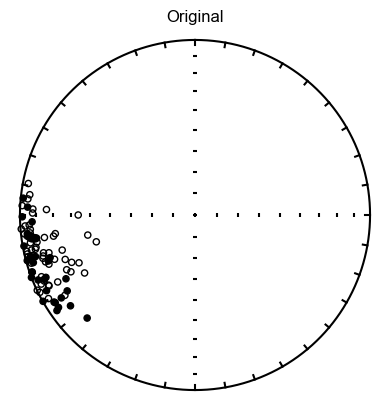

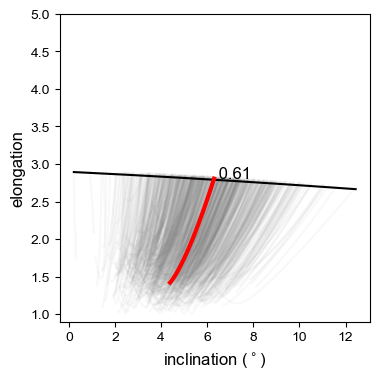

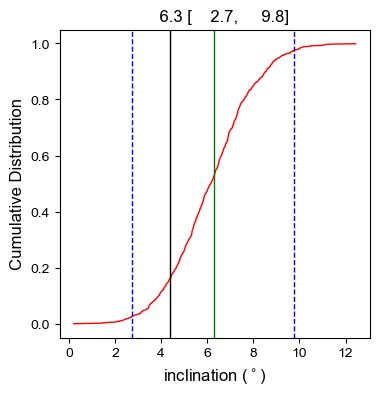

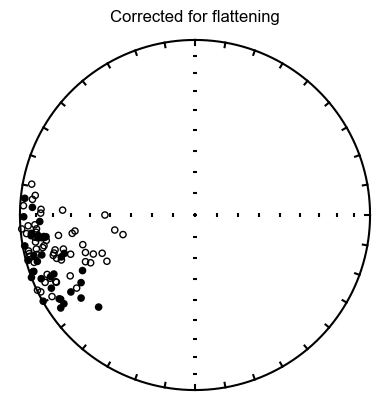

In [235]:
ipmag.find_ei(BR_HT_DI)

In [17]:
BR_HT_unsquished_inc=ipmag.unsquish(BR_HT['dir_inc'].tolist(),0.61)
BR_HT_unsquished_mean=ipmag.fisher_mean(dec=BR_HT['dir_dec'].tolist(),inc=BR_HT_unsquished_inc)

BRa_HT_unsquished_inc=ipmag.unsquish(BRa_HT['dir_inc'].tolist(),0.61)
BRa_HT_unsquished_mean=ipmag.fisher_mean(dec=BRa_HT['dir_dec'].tolist(),inc=BRa_HT_unsquished_inc)

BRb_HT_unsquished_inc=ipmag.unsquish(BRb_HT['dir_inc'].tolist(),0.61)
BRb_HT_unsquished_mean=ipmag.fisher_mean(dec=BRb_HT['dir_dec'].tolist(),inc=BRb_HT_unsquished_inc)

BRc_HT_unsquished_inc=ipmag.unsquish(BRc_HT['dir_inc'].tolist(),0.61)
BRc_HT_unsquished_mean=ipmag.fisher_mean(dec=BRc_HT['dir_dec'].tolist(),inc=BRc_HT_unsquished_inc)

BRd_HT_unsquished_inc=ipmag.unsquish(BRd_HT['dir_inc'].tolist(),0.61)
BRd_HT_unsquished_mean=ipmag.fisher_mean(dec=BRd_HT['dir_dec'].tolist(),inc=BRd_HT_unsquished_inc)



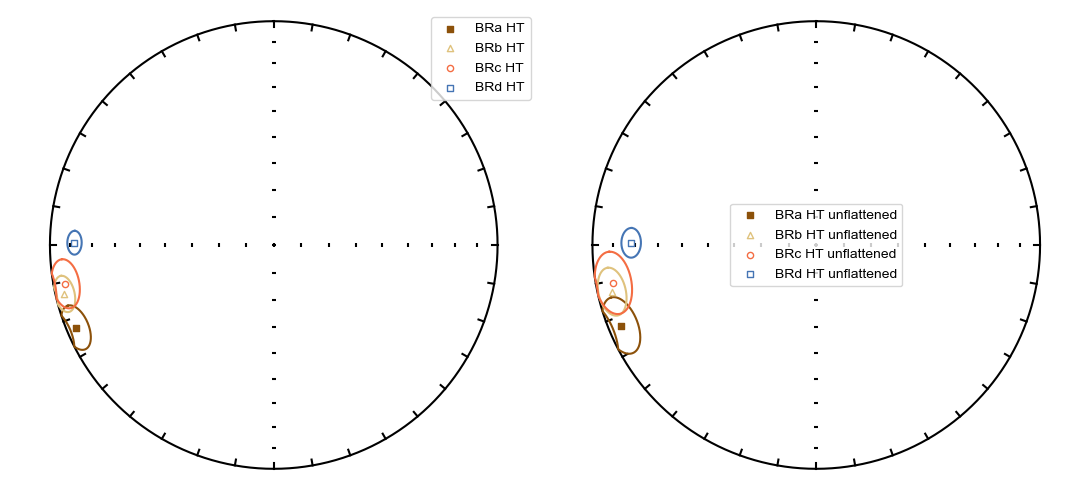

In [18]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
ipmag.plot_net()


ipmag.plot_di_mean(dec=BRa_HT_mean['dec'],inc=BRa_HT_mean['inc'],
                   a95=BRa_HT_mean['alpha95'],color='#8c510a', marker='s',
                  label='BRa HT')

ipmag.plot_di_mean(dec=BRb_HT_mean['dec'],inc=BRb_HT_mean['inc'],
                   a95=BRb_HT_mean['alpha95'],color='#dfc27d', marker='^',
                  label='BRb HT')

ipmag.plot_di_mean(dec=BRc_HT_mean['dec'],inc=BRc_HT_mean['inc'],
                   a95=BRc_HT_mean['alpha95'],color='#f46d43', marker='o',
                  label='BRc HT')

ipmag.plot_di_mean(dec=BRd_HT_mean['dec'],inc=BRd_HT_mean['inc'],
                   a95=BRd_HT_mean['alpha95'],color='#4575b4', marker='s',
                  label='BRd HT')
plt.legend()

plt.subplot(1,2,2)
ipmag.plot_net()


ipmag.plot_di_mean(dec=BRa_HT_unsquished_mean['dec'],inc=BRa_HT_unsquished_mean['inc'],
                   a95=BRa_HT_unsquished_mean['alpha95'],color='#8c510a', marker='s',
                  label='BRa HT unflattened')

ipmag.plot_di_mean(dec=BRb_HT_unsquished_mean['dec'],inc=BRb_HT_unsquished_mean['inc'],
                   a95=BRb_HT_unsquished_mean['alpha95'],color='#dfc27d', marker='^',
                  label='BRb HT unflattened')

ipmag.plot_di_mean(dec=BRc_HT_unsquished_mean['dec'],inc=BRc_HT_unsquished_mean['inc'],
                   a95=BRc_HT_unsquished_mean['alpha95'],color='#f46d43', marker='o',
                  label='BRc HT unflattened')

ipmag.plot_di_mean(dec=BRd_HT_unsquished_mean['dec'],inc=BRd_HT_unsquished_mean['inc'],
                   a95=BRd_HT_unsquished_mean['alpha95'],color='#4575b4', marker='s',
                  label='BRd HT unflattened')

plt.legend()

Comparison of HT vs MT mean for BR sections

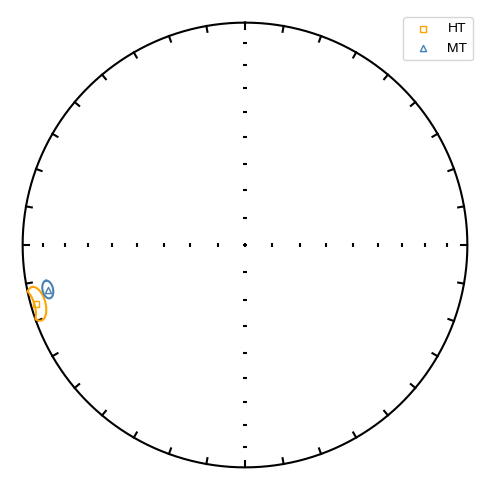

In [19]:
plt.figure(figsize=(5,5))
ipmag.plot_net()

ipmag.plot_di_mean(dec=BR_HT_unsquished_mean['dec'],inc=BR_HT_unsquished_mean['inc'],a95=BR_HT_unsquished_mean['alpha95'],color='orange', marker='s' ,label='HT')
ipmag.plot_di_mean(dec=BR_MT_mean['dec'],inc=BR_MT_mean['inc'],a95=BR_MT_mean['alpha95'],color='steelblue', marker='^' ,label='MT')
plt.legend()

In [20]:
BR_HT['lon']=-90.6
BR_HT['lat']=46.4

BR_MT['lon']=-90.6
BR_MT['lat']=46.4

BR_unflat_HT=BR_HT
BR_unflat_HT['dir_inc']=BR_HT_unsquished_inc
BR_unflat_HT=ipmag.vgp_calc(BR_unflat_HT,tilt_correction='no',site_lon='lon',site_lat='lat',dec_is='dir_dec',inc_is='dir_inc')
BR_MT=ipmag.vgp_calc(BR_MT,tilt_correction='no',site_lon='lon',site_lat='lat',dec_is='dir_dec',inc_is='dir_inc')


BR DRM vs CRM pole position

In [21]:
BR_HT_pole=ipmag.fisher_mean(BR_unflat_HT['vgp_lon'].tolist(),BR_unflat_HT['vgp_lat'].tolist())
BR_MT_pole=ipmag.fisher_mean(BR_MT['vgp_lon'].tolist(),BR_MT['vgp_lat'].tolist())

ipmag.print_pole_mean(BR_HT_pole)

ipmag.print_pole_mean(BR_MT_pole)

Plon: 190.3  Plat: -11.9
Number of directions in mean (n): 99
Angular radius of 95% confidence (A_95): 3.2
Precision parameter (k) estimate: 20.6
Plon: 185.2  Plat: -12.5
Number of directions in mean (n): 97
Angular radius of 95% confidence (A_95): 1.9
Precision parameter (k) estimate: 59.4


In [22]:
ht_axis=ipmag.make_orthographic_map(200,20)

ipmag.plot_vgp(ht_axis,BR_unflat_HT['vgp_lon'],BR_unflat_HT['vgp_lat'],markersize=5)
ipmag.plot_pole(ht_axis,BR_HT_pole['dec'],BR_HT_pole['inc'],BR_HT_pole['alpha95'],marker='s',markersize=50,color='orange')

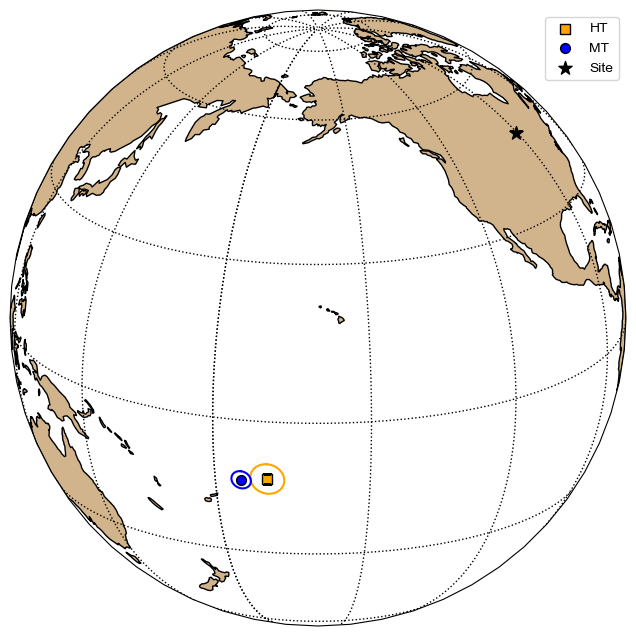

In [23]:
ht_axis=ipmag.make_orthographic_map(200,20)
ipmag.plot_pole(ht_axis,BR_HT_pole['dec'],BR_HT_pole['inc'],BR_HT_pole['alpha95'],marker='s',markersize=50,color='orange',label='HT')
ipmag.plot_pole(ht_axis,BR_MT_pole['dec'],BR_MT_pole['inc'],BR_MT_pole['alpha95'],marker='o',markersize=50,color='blue',label='MT')
ipmag.plot_pole(ht_axis,lr_lon,lr_lat,0,marker='*',markersize=100,label='Site')

plt.legend()

## White River Flowage (WRF)
These data are from the middle Freda Formation within the Ashland Syncline

In [24]:
WRF_specimen['lon'] = -90.5
WRF_specimen['lat'] = 46.5
WRF_specimen = ipmag.vgp_calc(WRF_specimen,tilt_correction='no',
                           site_lon='lon',
                           site_lat='lat',
                           dec_is='dir_dec',
                           inc_is='dir_inc')


In [25]:
WRF_HT=WRF_specimen[(WRF_specimen['dir_comp']=='HT')&(WRF_specimen['dir_tilt_correction']==100)]
WRF_MT=WRF_specimen[(WRF_specimen['dir_comp']=='MT')&(WRF_specimen['dir_tilt_correction']==100)]

WRF_HT_mean=ipmag.fisher_mean(dec=WRF_HT['dir_dec'].tolist(), inc=WRF_HT['dir_inc'].tolist())
WRF_MT_mean=ipmag.fisher_mean(dec=WRF_MT['dir_dec'].tolist(), inc=WRF_MT['dir_inc'].tolist())

WRF_HT_mean

{'dec': 299.148142231941,
 'inc': -0.053247373758703066,
 'n': 71,
 'r': 67.34833723979824,
 'k': 19.16934958039017,
 'alpha95': 3.946125995636355,
 'csd': 18.5004090185224}

In [26]:
WRF_HT_filtered=WRF_HT[WRF_HT['dir_inc']>-25]

In [27]:
WRF_HT_DI=ipmag.make_di_block(dec=WRF_HT_filtered['dir_dec'].tolist(), inc=WRF_HT_filtered['dir_inc'].tolist())
WRF_MT_DI=ipmag.make_di_block(dec=WRF_MT['dir_dec'].tolist(), inc=WRF_MT['dir_inc'].tolist())

Bootstrapping.... be patient

The original inclination was: 0.86

The corrected inclination is: 1.43
with bootstrapped confidence bounds of: 0.07 to 7.39
and elongation parameter of: 2.9
The flattening factor is: 0.58
with bootstrapped confidence bounds of: 11.95 to 0.12


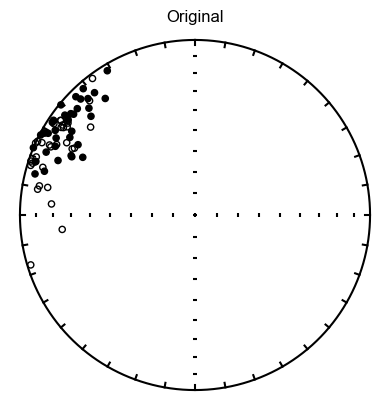

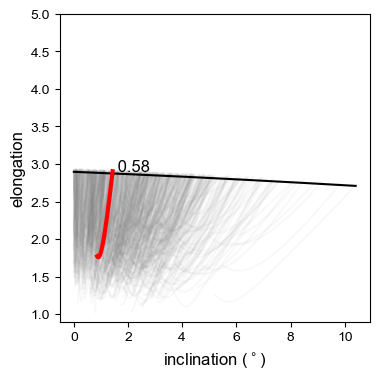

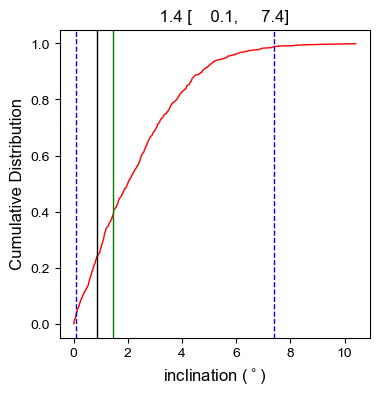

In [255]:
ipmag.find_ei(WRF_HT_DI)

In [28]:
WRF_ht_unsquished_inc=ipmag.unsquish(WRF_HT['dir_inc'].tolist(),0.58)
WRF_ht_unsquished_mean=ipmag.fisher_mean(dec=WRF_HT['dir_dec'].tolist(),inc=WRF_ht_unsquished_inc)

In [29]:
WRF_unflat_HT=WRF_HT.drop(['paleolatitude','vgp_lat','vgp_lon',
                              'vgp_lat_rev','vgp_lon_rev'],axis=1)
WRF_unflat_HT['dir_inc']=WRF_ht_unsquished_inc


WRF_unflat_HT=ipmag.vgp_calc(WRF_unflat_HT,tilt_correction='no',
                           site_lon='lon',
                           site_lat='lat',
                           dec_is='dir_dec',
                           inc_is='dir_inc')

WRF_unflat_HT_pole=ipmag.fisher_mean(WRF_unflat_HT['vgp_lon'].tolist(),WRF_unflat_HT['vgp_lat'].tolist())
ipmag.print_pole_mean(WRF_unflat_HT_pole)

Plon: 157.5  Plat: 19.5
Number of directions in mean (n): 71
Angular radius of 95% confidence (A_95): 3.7
Precision parameter (k) estimate: 21.6


## LRa and LRb data
This section is for the processing of the Lake Road (LR) sections 

In [30]:
LR_specimen['lon'] = -90.4
LR_specimen['lat'] = 46.6
LR_specimen = ipmag.vgp_calc(LR_specimen,tilt_correction='no',
                           site_lon='lon',
                           site_lat='lat',
                           dec_is='dir_dec',
                           inc_is='dir_inc')


Filter out the HT and MT components and find the tilt-corrected values 

In [31]:
LR_HT=LR_specimen[(LR_specimen['dir_comp']=='HT')&(LR_specimen['dir_tilt_correction']==100)]# Tilt-corrected
LR_MT=LR_specimen[(LR_specimen['dir_comp']=='MT')&(LR_specimen['dir_tilt_correction']==100)]

LR_HT_geo=LR_specimen[(LR_specimen['dir_comp']=='HT')&(LR_specimen['dir_tilt_correction']==0)] # Geographic 
LR_MT_geo=LR_specimen[(LR_specimen['dir_comp']=='MT')&(LR_specimen['dir_tilt_correction']==0)]

Calculate the Fisher Means for the tilt-corrected data 

In [32]:
LR_HT_mean=ipmag.fisher_mean(dec=LR_HT['dir_dec'].tolist(), inc=LR_HT['dir_inc'].tolist())
print('LR HT mean:')
ipmag.print_direction_mean(LR_HT_mean)

print('')
print('LR MT mean:')
LR_MT_mean=ipmag.fisher_mean(dec=LR_MT['dir_dec'].tolist(), inc=LR_MT['dir_inc'].tolist())
ipmag.print_direction_mean(LR_MT_mean)

LR HT mean:
Dec: 299.0  Inc: 4.7
Number of directions in mean (n): 105
Angular radius of 95% confidence (a_95): 3.2
Precision parameter (k) estimate: 19.1

LR MT mean:
Dec: 298.8  Inc: -0.6
Number of directions in mean (n): 83
Angular radius of 95% confidence (a_95): 2.8
Precision parameter (k) estimate: 31.1


Let's now compare the HT vs MT means

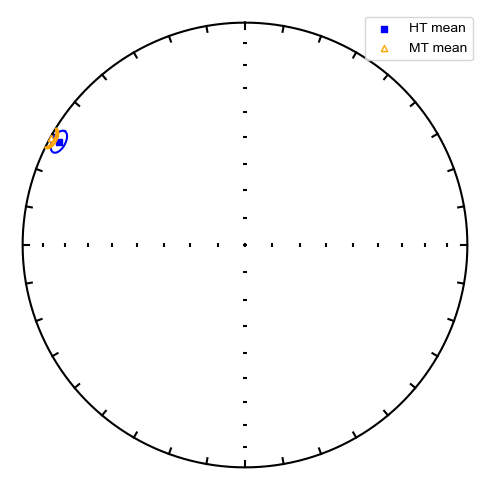

In [33]:
plt.figure(figsize=(5,5))
ipmag.plot_net()


ipmag.plot_di_mean(dec=LR_HT_mean['dec'],inc=LR_HT_mean['inc'],a95=LR_HT_mean['alpha95'],color='blue', marker='s',label='HT mean')
ipmag.plot_di_mean(dec=LR_MT_mean['dec'],inc=LR_MT_mean['inc'],a95=LR_MT_mean['alpha95'],color='orange', marker='^',label='MT mean')
plt.legend()

## Common Mean test 

This block will run the common mean test for the HT and MT components- We can see that the two directional groups are distinguishable 

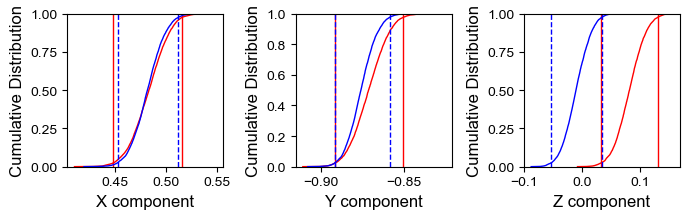

Pass


1

In [34]:
LR_HT_DI=ipmag.make_di_block(dec=LR_HT['dir_dec'].tolist(), inc=LR_HT['dir_inc'].tolist())
LR_MT_DI=ipmag.make_di_block(dec=LR_MT['dir_dec'].tolist(), inc=LR_MT['dir_inc'].tolist())
ipmag.common_mean_bootstrap(LR_HT_DI,LR_MT_DI)

In [35]:
LR_HT_pole=ipmag.fisher_mean(LR_HT['vgp_lon'].tolist(),LR_HT['vgp_lat'].tolist())

ipmag.print_pole_mean(LR_HT_pole)

Plon: 159.3  Plat: 21.4
Number of directions in mean (n): 105
Angular radius of 95% confidence (A_95): 2.5
Precision parameter (k) estimate: 32.2


## LR section E/I correction

Bootstrapping.... be patient

The original inclination was: 4.64

The corrected inclination is: 6.16
with bootstrapped confidence bounds of: 2.4 to 10.57
and elongation parameter of: 2.82
The flattening factor is: 0.72
with bootstrapped confidence bounds of: 1.94 to 0.44


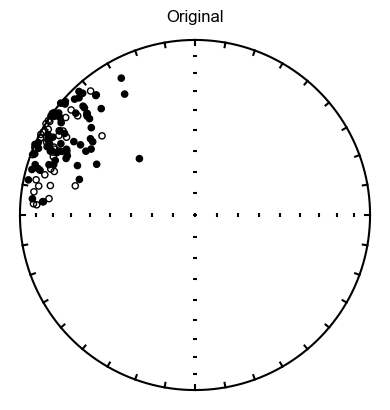

In [15]:
# First have to find the flattening factor using the E/I method
ipmag.find_ei(LR_HT_DI)

We apply this unflattening factor here 

In [36]:
LR_ht_unsquished_inc=ipmag.unsquish(LR_HT['dir_inc'].tolist(),0.72)
LR_ht_unsquished_mean=ipmag.fisher_mean(dec=LR_HT['dir_dec'].tolist(),inc=LR_ht_unsquished_inc)

ipmag.print_direction_mean(LR_ht_unsquished_mean)

Dec: 299.0  Inc: 6.2
Number of directions in mean (n): 105
Angular radius of 95% confidence (a_95): 3.9
Precision parameter (k) estimate: 13.6


Calculate the unflattened pole position

In [37]:
LR_unflat_HT=LR_HT.drop(['paleolatitude','vgp_lat','vgp_lon',
                              'vgp_lat_rev','vgp_lon_rev'],axis=1)
LR_unflat_HT['dir_inc']=LR_ht_unsquished_inc


LR_unflat_HT=ipmag.vgp_calc(LR_unflat_HT,tilt_correction='no',
                           site_lon='lon',
                           site_lat='lat',
                           dec_is='dir_dec',
                           inc_is='dir_inc')
LR_unflat_HT_pole=ipmag.fisher_mean(LR_unflat_HT['vgp_lon'].tolist(),LR_unflat_HT['vgp_lat'].tolist())
ipmag.print_pole_mean(LR_unflat_HT_pole)

Plon: 160.0  Plat: 22.1
Number of directions in mean (n): 105
Angular radius of 95% confidence (A_95): 2.7
Precision parameter (k) estimate: 26.1


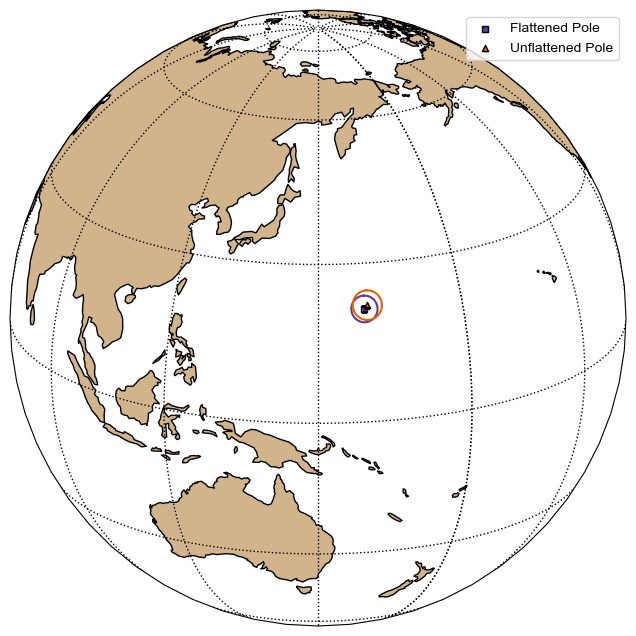

In [38]:
# Plot flattened vs unflattened
ht_axis=ipmag.make_orthographic_map(150,20)

ipmag.plot_pole(ht_axis,LR_HT_pole['dec'],LR_HT_pole['inc'],
                LR_HT_pole['alpha95'],marker='s',color='#5e3c99',label='Flattened Pole')
ipmag.plot_pole(ht_axis,LR_unflat_HT_pole['dec'],LR_unflat_HT_pole['inc'],
LR_unflat_HT_pole['alpha95'],marker='^',color='#e66101',label='Unflattened Pole')
plt.legend()

## Wolf Point 

This section covers the upper Freda Pole directions on the basis of no apparent vertical axis rotation 

In [39]:
wp_specimens['lon']=-89
wp_specimens['lat']=47.0
wp_specimens=ipmag.vgp_calc(wp_specimens,tilt_correction='no',
                           site_lon='lon',
                           site_lat='lat',
                           dec_is='dir_dec',
                           inc_is='dir_inc')

Split up into HT and MT components

In [40]:
wp_HT=wp_specimens[(wp_specimens['dir_comp']=='HT')&(wp_specimens['dir_tilt_correction']==100)]
wp_MT=wp_specimens[(wp_specimens['dir_comp']=='MT')&(wp_specimens['dir_tilt_correction']==100)]

Calculate the unflattening corrected mean

In [41]:
wp_HT_mean=ipmag.fisher_mean(dec=wp_HT['dir_dec'].tolist(), inc=wp_HT['dir_inc'].tolist())
print('WP HT mean:')
ipmag.print_direction_mean(wp_HT_mean)

wp_MT_mean=ipmag.fisher_mean(dec=wp_MT['dir_dec'].tolist(), inc=wp_MT['dir_inc'].tolist())
print('')
print('WP MT mean:')
ipmag.print_direction_mean(wp_MT_mean)

WP HT mean:
Dec: 281.5  Inc: -7.9
Number of directions in mean (n): 90
Angular radius of 95% confidence (a_95): 2.8
Precision parameter (k) estimate: 28.4

WP MT mean:
Dec: 280.3  Inc: -9.9
Number of directions in mean (n): 55
Angular radius of 95% confidence (a_95): 3.1
Precision parameter (k) estimate: 39.9


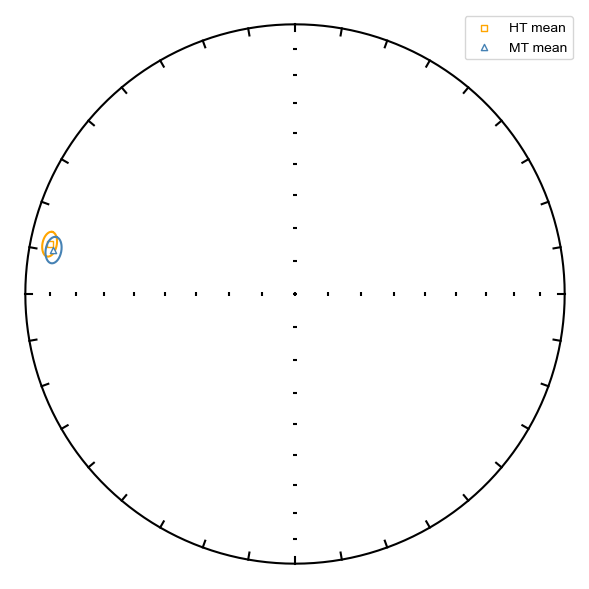

In [42]:
plt.figure(figsize=(6,6))
ipmag.plot_net()

ipmag.plot_di_mean(dec=wp_HT_mean['dec'],inc=wp_HT_mean['inc'],a95=wp_HT_mean['alpha95'],color='orange', marker='s' ,label='HT mean')
ipmag.plot_di_mean(dec=wp_MT_mean['dec'],inc=wp_MT_mean['inc'],a95=wp_MT_mean['alpha95'],color='steelblue', marker='^' ,label='MT mean')
plt.legend()

Test the two directions to see if they share a common mean

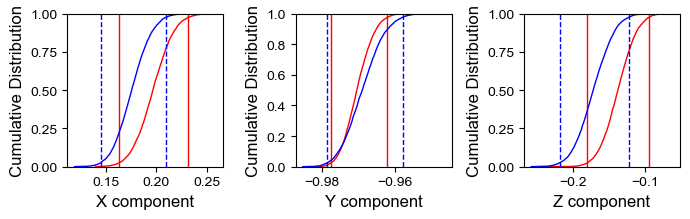

Pass


1

In [136]:
wp_HT_DI=ipmag.make_di_block(dec=wp_HT['dir_dec'].tolist(), inc=wp_HT['dir_inc'].tolist())
wp_MT_DI=ipmag.make_di_block(dec=wp_MT['dir_dec'].tolist(), inc=wp_MT['dir_inc'].tolist())
ipmag.common_mean_bootstrap(wp_HT_DI,wp_MT_DI)

Calculate the flattened pole (uncorrected)

In [43]:
wp_HT_pole=ipmag.fisher_mean(wp_HT['vgp_lon'].tolist(),wp_HT['vgp_lat'].tolist())
ipmag.print_pole_mean(wp_HT_pole)

Plon: 169.8  Plat: 4.7
Number of directions in mean (n): 90
Angular radius of 95% confidence (A_95): 2.1
Precision parameter (k) estimate: 49.8


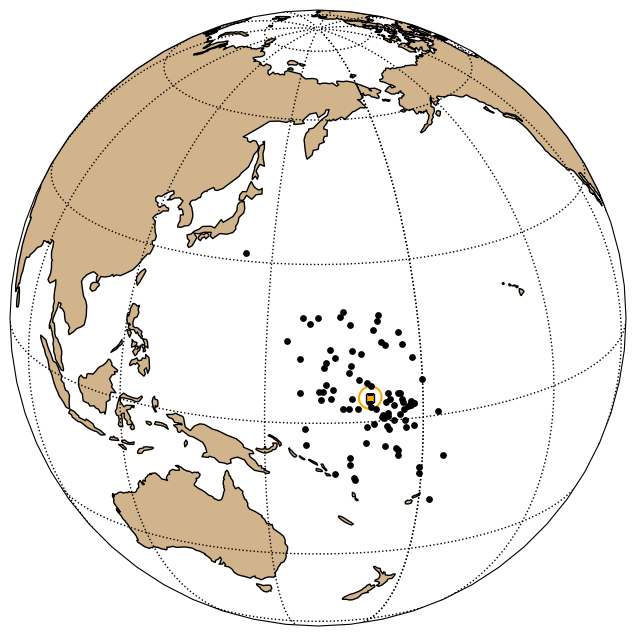

In [44]:
ht_axis=ipmag.make_orthographic_map(160,20)

ipmag.plot_vgp(ht_axis,wp_HT['vgp_lon'],wp_HT['vgp_lat'],markersize=15)
ipmag.plot_pole(ht_axis,wp_HT_pole['dec'],wp_HT_pole['inc'],wp_HT_pole['alpha95'],marker='s',markersize=30,color='orange')

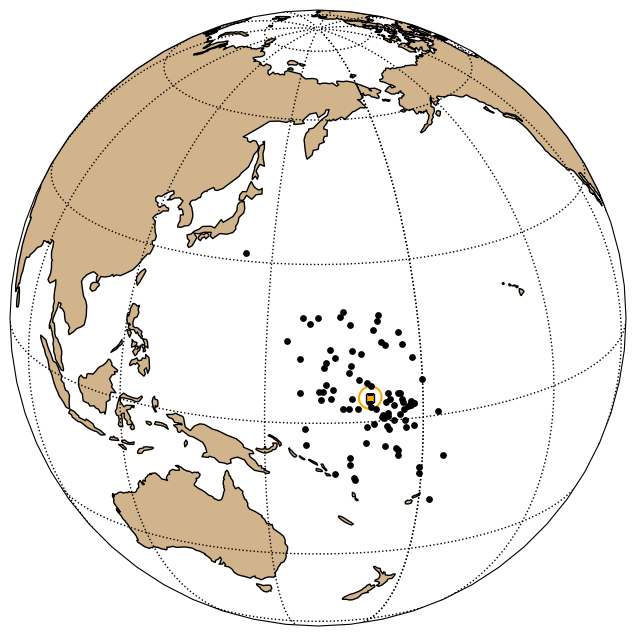

In [45]:
ht_axis=ipmag.make_orthographic_map(160,20)

ipmag.plot_vgp(ht_axis,wp_HT['vgp_lon'],wp_HT['vgp_lat'],markersize=15)
ipmag.plot_pole(ht_axis,wp_HT_pole['dec'],wp_HT_pole['inc'],wp_HT_pole['alpha95'],marker='s',markersize=30,color='orange')

## Inclination shallowing correction

In [140]:
wp_HT_filtered=wp_HT[wp_HT['dir_inc']<0]
wp_HT_DI=ipmag.make_di_block(dec=wp_HT_filtered['dir_dec'].tolist(), inc=wp_HT_filtered['dir_inc'].tolist())


In [278]:
ht_tc_ei_corrected, EI_incs, EI_elongs, EI_fs=ipmag.find_ei(wp_HT_DI,return_new_dirs=1,return_values=True)

Bootstrapping.... be patient

The original inclination was: 12.48

The corrected inclination is: 19.27
with bootstrapped confidence bounds of: 14.85 to 23.43
and elongation parameter of: 2.53
The flattening factor is: 0.6
with bootstrapped confidence bounds of: 0.83 to 0.51


In [46]:
wp_ht_unsquished_inc=ipmag.unsquish(wp_HT['dir_inc'].tolist(),0.6)
wp_ht_unsquished_mean=ipmag.fisher_mean(dec=wp_HT['dir_dec'].tolist(),inc=wp_ht_unsquished_inc)
wp_ht_unsquished_mean

{'dec': 281.552028505907,
 'inc': -12.259207963663357,
 'n': 90,
 'r': 84.43715580914598,
 'k': 15.999010029136999,
 'alpha95': 3.848772685037542,
 'csd': 20.25062649500932}

In [47]:
wp_unflat_HT=wp_HT.drop(['paleolatitude','vgp_lat','vgp_lon',
                              'vgp_lat_rev','vgp_lon_rev'],axis=1)
wp_unflat_HT['dir_inc']=wp_ht_unsquished_inc

wp_unflat_HT=ipmag.vgp_calc(wp_unflat_HT,tilt_correction='no',
                           site_lon='lon',
                           site_lat='lat',
                           dec_is='dir_dec',
                           inc_is='dir_inc')

wp_unflat_HT_pole=ipmag.fisher_mean(wp_unflat_HT['vgp_lon'].tolist(),wp_unflat_HT['vgp_lat'].tolist())
ipmag.print_pole_mean(wp_unflat_HT_pole)

Plon: 168.1  Plat: 2.8
Number of directions in mean (n): 90
Angular radius of 95% confidence (A_95): 2.6
Precision parameter (k) estimate: 34.0


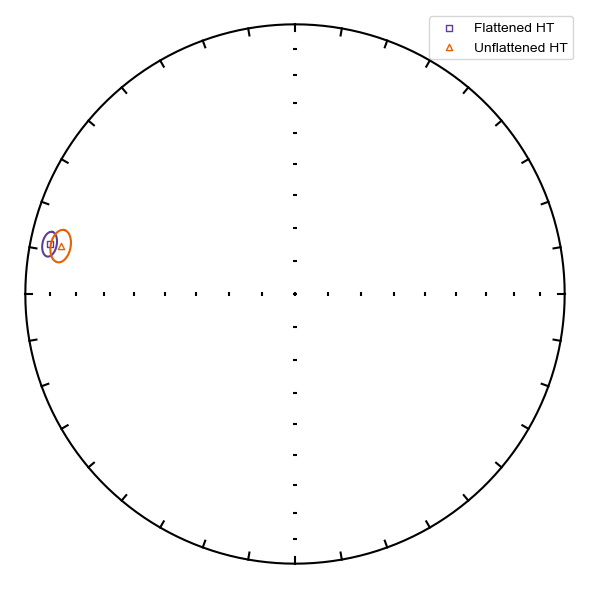

In [48]:
plt.figure(figsize=(6,6))
ipmag.plot_net()


ipmag.plot_di_mean(dec=wp_HT_mean['dec'],inc=wp_HT_mean['inc'],
                   a95=wp_HT_mean['alpha95'],color='#5e3c99', marker='s',
                  label='Flattened HT')
ipmag.plot_di_mean(dec=wp_ht_unsquished_mean['dec'],inc=wp_ht_unsquished_mean['inc'],
                   a95=wp_ht_unsquished_mean['alpha95'],color='#e66101', marker='^',
                  label='Unflattened HT')
plt.legend()


In [49]:
# Plot flattened vs unflattened
ht_axis=ipmag.make_orthographic_map(150,20)

ipmag.plot_pole(ht_axis,wp_HT_pole['dec'],wp_HT_pole['inc'],
                wp_HT_pole['alpha95'],marker='s',color='#5e3c99',label=' WP Flattened Pole')
ipmag.plot_pole(ht_axis,wp_unflat_HT_pole['dec'],wp_unflat_HT_pole['inc'],
wp_unflat_HT_pole['alpha95'],marker='^',color='#e66101',label=' WP Unflattened Pole')
plt.legend()

# Previous Oronto Group Studies 

We are reading in the Nonesuch and lower Freda Formation data from Henry et al., 1977 and Slotznick et al., 2023

In [50]:
Henry_specimen = pd.read_csv('../data/MagIC_Format/Henry_1977/specimens.txt',sep='\t', header=1) 
Henry_specimen['lon'] = -89.6
Henry_specimen['lat'] = 46.8
Henry_specimen = ipmag.vgp_calc(Henry_specimen,tilt_correction='no',
                           site_lon='lon',
                           site_lat='lat',
                           dec_is='dir_dec',
                           inc_is='dir_inc')


Henry_spec=Henry_specimen[Henry_specimen['description']=='Freda sandstone']


In [51]:
Henry_HT=Henry_spec[(Henry_spec['dir_comp']=='PRIM')&(Henry_spec['dir_tilt_correction']==100)]
Henry_MT=Henry_spec[(Henry_spec['dir_comp']=='SEC')&(Henry_spec['dir_tilt_correction']==100)]


Henry_HT=Henry_HT[Henry_HT['dir_dec']>240]

Henry_HT_mean=ipmag.fisher_mean(dec=Henry_HT['dir_dec'].tolist(), inc=Henry_HT['dir_inc'].tolist())
Henry_MT_mean=ipmag.fisher_mean(dec=Henry_MT['dir_dec'].tolist(), inc=Henry_MT['dir_inc'].tolist())

Henry_HT_unsquished_inc=ipmag.unsquish(Henry_HT['dir_inc'].tolist(),0.48)
Henry_HT_unsquished_mean=ipmag.fisher_mean(dec=Henry_HT['dir_dec'].tolist(),inc=Henry_HT_unsquished_inc)

Henry_HT_mean

{'dec': 271.3160673222449,
 'inc': 0.7057824299409223,
 'n': 85,
 'r': 82.26803184559853,
 'k': 30.747064113711456,
 'alpha95': 2.813837509028089,
 'csd': 14.60774544264106}

In [52]:
Henry_HT_unflat=Henry_HT
Henry_HT_unflat['incs']=Henry_HT_unsquished_inc

Henry_HT_unflat= ipmag.vgp_calc(Henry_HT_unflat,tilt_correction='no',
                           site_lon='lon',
                           site_lat='lat',
                           dec_is='dir_dec',
                           inc_is='dir_inc')
Henry_ht_pole=ipmag.fisher_mean(Henry_HT_unflat['vgp_lon'].tolist(),Henry_HT_unflat['vgp_lat'].tolist())
Henry_mt_pole=ipmag.fisher_mean(Henry_MT['vgp_lon'].tolist(),Henry_MT['vgp_lat'].tolist())

In [53]:
nsch_specimens=pd.read_csv('../data/MagIC_format/Nonesuch/specimens.txt',sep='\t',header=1)

nsch_hmt_drm=nsch_specimens[(nsch_specimens['dir_comp'] == 'hdt') & (nsch_specimens['dir_tilt_correction'] == 100)]
nsch_hmt_crm=nsch_specimens[(nsch_specimens['dir_comp'] == 'hct') & (nsch_specimens['dir_tilt_correction'] == 100)]


Henry_nsch=Henry_specimen[Henry_specimen['description']=='Nonesuch shale']
Henry_nsch_crm=Henry_nsch[Henry_nsch['dir_comp']=='SEC']

nsch_hmt_crm=pd.concat([nsch_hmt_crm,Henry_nsch_crm])



nsch_hdt_incs = nsch_hmt_drm['dir_inc'].tolist()
nsch_unsquished_incs = ipmag.unsquish(nsch_hdt_incs, 0.46)
nsch_drm_mean=ipmag.fisher_mean(dec=nsch_hmt_drm['dir_dec'].tolist(),inc=nsch_unsquished_incs)
nsch_crm_mean=ipmag.fisher_mean(dec=nsch_hmt_crm['dir_dec'].tolist(),inc=nsch_hmt_crm['dir_inc'].tolist())



# Fold Test

This section will run the fold test for the entire Freda formation dataset including the work of Henry et al., 1977

In [54]:
Henry_HT_geo=Henry_spec[(Henry_specimen['dir_comp']=='PRIM')&(Henry_specimen['dir_tilt_correction']==0)]
Henry_MT_geo=Henry_spec[(Henry_specimen['dir_comp']=='SEC')&(Henry_specimen['dir_tilt_correction']==0)]


Henry_HT_geo=Henry_HT_geo[Henry_HT_geo['dir_dec']>240]
Henry_MT_geo=Henry_MT_geo[Henry_MT_geo['dir_dec']>240]

Henry_samples = pd.read_csv('../data/MagIC_Format/Henry_1977/samples.txt',sep='\t', header=1) 
Henry_samples_bedding = Henry_samples[['sample','bed_dip_direction','bed_dip']]

Henry_HT_geo=pd.merge(Henry_HT_geo,Henry_samples_bedding,on='sample')
Henry_MT_geo=pd.merge(Henry_MT_geo,Henry_samples_bedding,on='sample')

In [55]:
freda_ht_geo=all_specimens[(all_specimens['dir_comp']=='HT')&(all_specimens['dir_tilt_correction']==0)]
freda_mt_geo=all_specimens[(all_specimens['dir_comp']=='MT')&(all_specimens['dir_tilt_correction']==0)]

freda_ht=all_specimens[(all_specimens['dir_comp']=='HT')&(all_specimens['dir_tilt_correction']==100)]
freda_mt=all_specimens[(all_specimens['dir_comp']=='MT')&(all_specimens['dir_tilt_correction']==100)]

freda_ht=pd.concat([freda_ht,Henry_HT],ignore_index=True)
freda_mt=pd.concat([freda_mt,Henry_MT],ignore_index=True)


In [56]:
all_bedding=all_samples[['sample','bed_dip','bed_dip_direction']].reset_index()


In [58]:
freda_ht_geo=pd.merge(freda_ht_geo,all_bedding,on='sample')
freda_mt_geo=pd.merge(freda_mt_geo,all_bedding,on='sample')

freda_ht_geo=pd.concat([freda_ht_geo,Henry_HT_geo],ignore_index=True)
freda_mt_geo=pd.concat([freda_mt_geo,Henry_MT_geo],ignore_index=True)

In [59]:
freda_ht_did=ipmag.make_diddd_array(freda_ht_geo['dir_dec'].tolist(),freda_ht_geo['dir_inc'].tolist(),freda_ht_geo['bed_dip_direction'].tolist(),freda_ht_geo['bed_dip'].tolist())
freda_mt_did=ipmag.make_diddd_array(freda_mt_geo['dir_dec'].tolist(),freda_mt_geo['dir_inc'].tolist(),freda_mt_geo['bed_dip_direction'].tolist(),freda_mt_geo['bed_dip'].tolist())


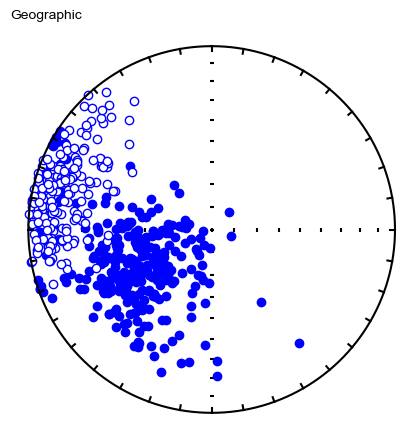

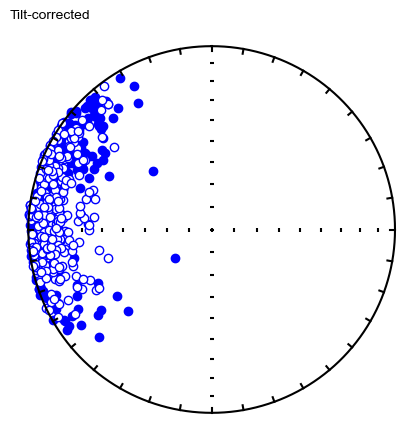

doing  1000  iterations...please be patient.....

tightest grouping of vectors obtained at (95% confidence bounds):
95 - 102 percent unfolding
range of all bootstrap samples: 
92  -  104 percent unfolding


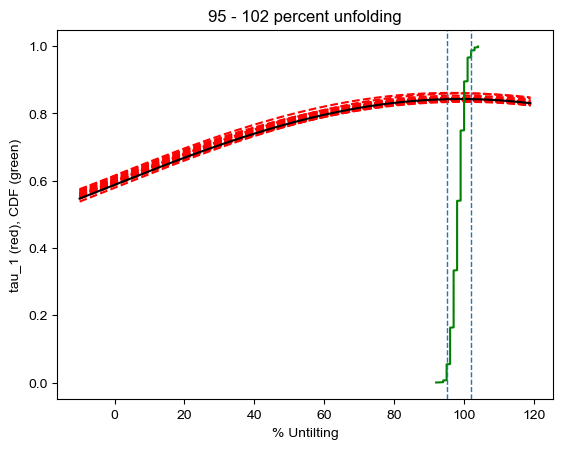

In [ ]:
ipmag.bootstrap_fold_test(freda_ht_did,save=False)

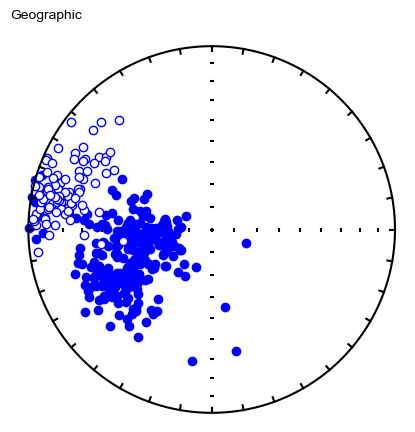

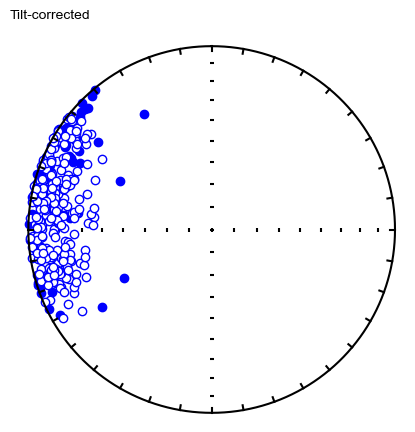

doing  1000  iterations...please be patient.....

tightest grouping of vectors obtained at (95% confidence bounds):
97 - 104 percent unfolding
range of all bootstrap samples: 
95  -  106 percent unfolding


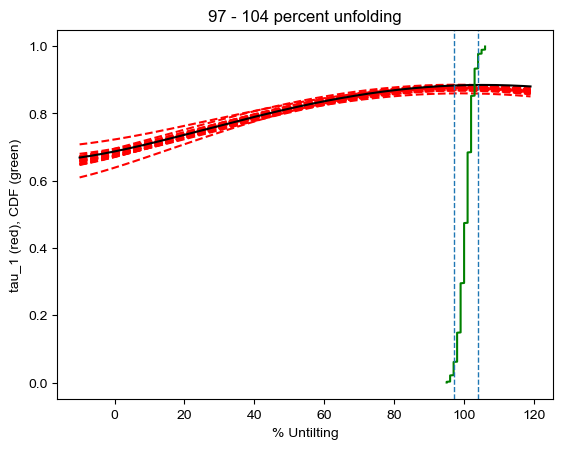

In [ ]:
ipmag.bootstrap_fold_test(freda_mt_did,save=False)

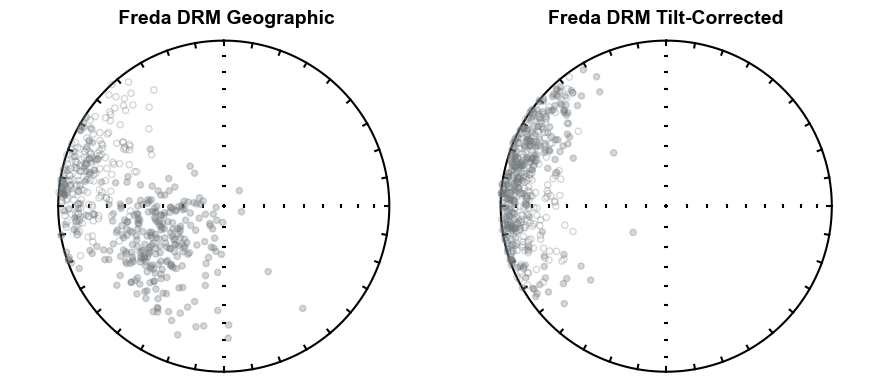

In [60]:
plt.figure(figsize=(9,4))

plt.subplot(1,2,1)
ipmag.plot_net()
plt.title(' Freda DRM Geographic',fontsize=14,fontweight='semibold')
ipmag.plot_di(dec=freda_ht_geo['dir_dec'].tolist(), inc=freda_ht_geo['dir_inc'].tolist(),color='#71797E',alpha=0.3)

plt.subplot(1,2,2)
ipmag.plot_net()
plt.title('Freda DRM Tilt-Corrected',fontsize=14,fontweight='semibold')
ipmag.plot_di(dec=freda_ht['dir_dec'].tolist(), inc=freda_ht['dir_inc'].tolist(),color='#71797E',alpha=0.3)


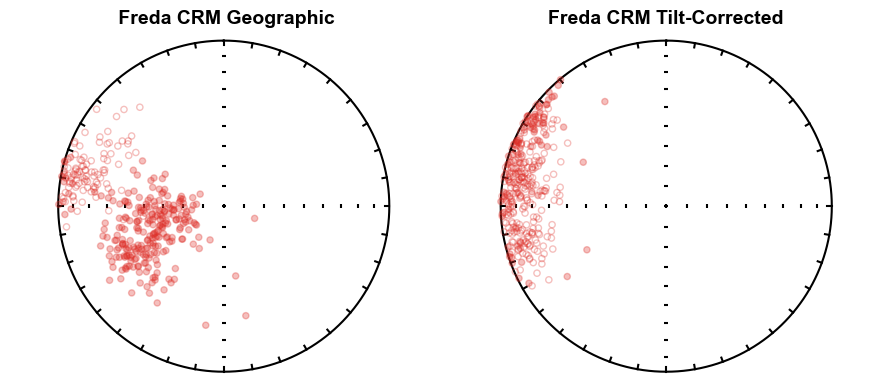

In [61]:
plt.figure(figsize=(9,4))

plt.subplot(1,2,1)
ipmag.plot_net()
plt.title(' Freda CRM Geographic',fontsize=14,fontweight='semibold')
ipmag.plot_di(dec=freda_mt_geo['dir_dec'].tolist(), inc=freda_mt_geo['dir_inc'].tolist(),color='#de2d26',alpha=0.3)

plt.subplot(1,2,2)
ipmag.plot_net()
plt.title('Freda CRM Tilt-Corrected',fontsize=14,fontweight='semibold')
ipmag.plot_di(dec=freda_mt['dir_dec'].tolist(), inc=freda_mt['dir_inc'].tolist(),color='#de2d26',alpha=0.3)

# CRM Comparisons 

These plots correspond to the DRM vs CRM figures in the main text and supplement 

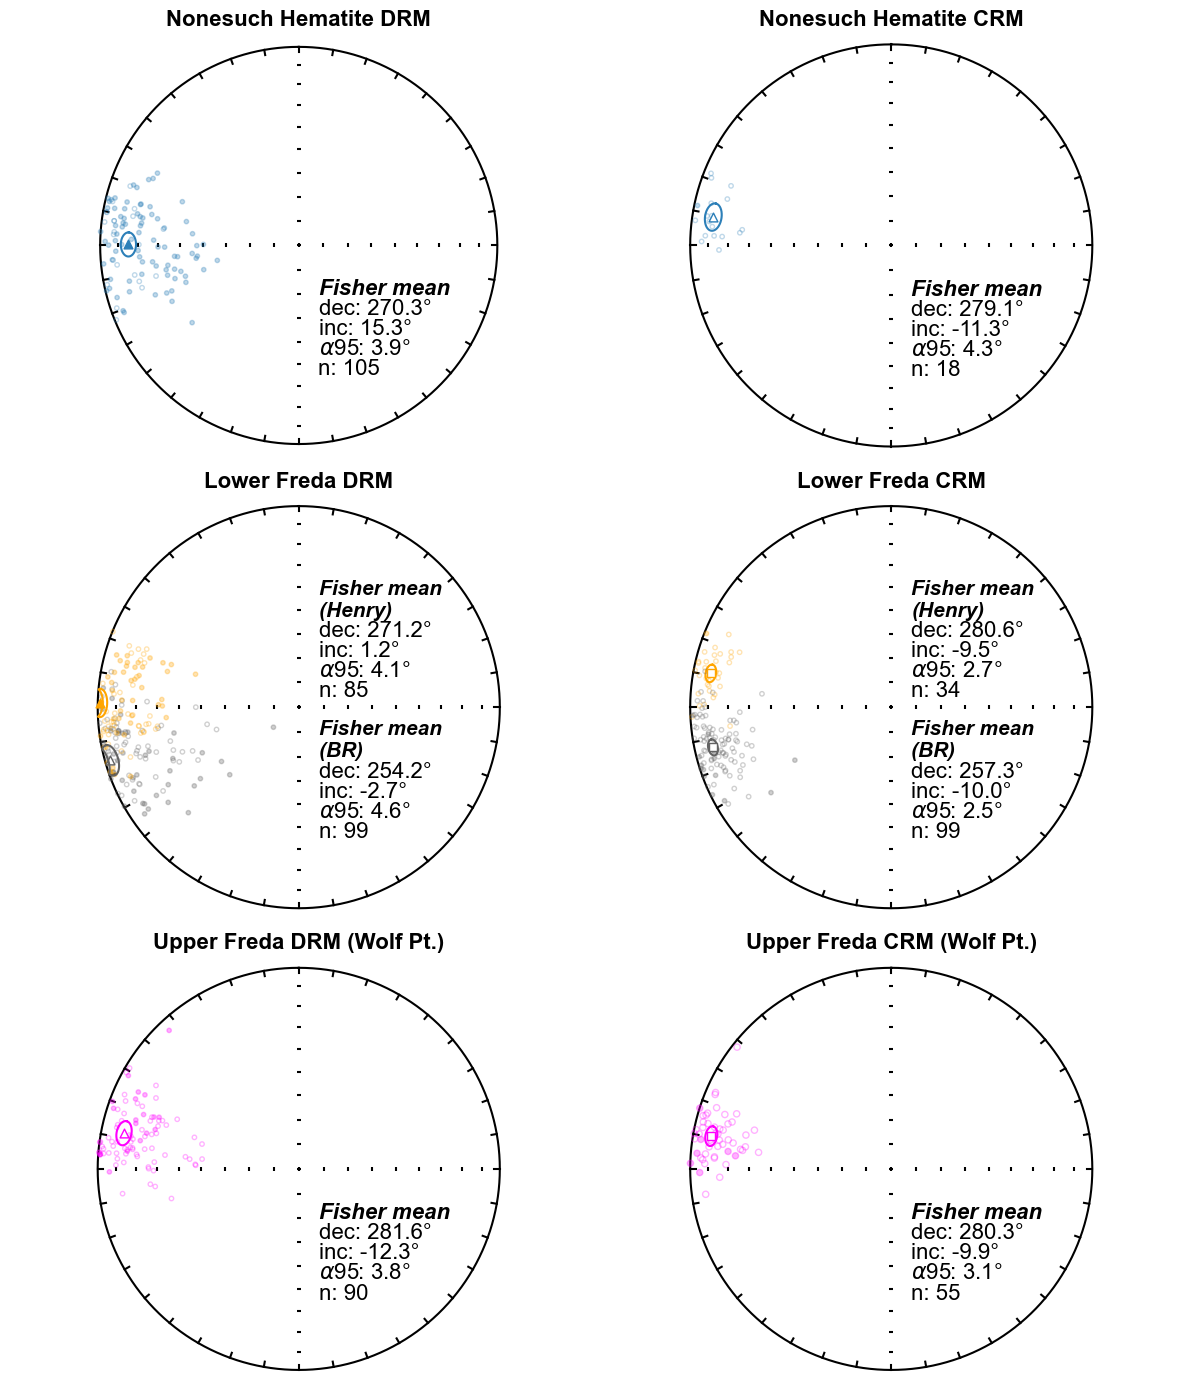

In [62]:
fig=plt.figure(figsize=(12,14))

plt.subplot(3,2,1)
ipmag.plot_net()
plt.title('Nonesuch Hematite DRM',fontsize=16,fontweight='semibold')
ipmag.plot_di(dec=nsch_hmt_drm['dir_dec'].tolist(), inc=nsch_unsquished_incs,color=nsch_color,markersize=10,alpha=0.3)
ipmag.plot_di_mean(dec=nsch_drm_mean['dec'],inc=nsch_drm_mean['inc'],a95=nsch_drm_mean['alpha95'],color=nsch_color, marker='^',markersize=40 )

plt.annotate('Fisher mean ',(0.1,-0.25),fontsize=16,style='italic',fontweight='semibold')
plt.annotate('dec: '+str(np.round(nsch_drm_mean['dec'],1))+'\u00b0',(0.1,-0.35),fontsize=16)
plt.annotate('inc: '+str(np.round(nsch_drm_mean['inc'],1))+'\u00b0',(0.1,-0.45),fontsize=16)
plt.annotate(r'$\alpha$95: '+str(np.round(nsch_drm_mean['alpha95'],1))+'\u00b0',(0.1,-0.55),fontsize=16)
plt.annotate('n: '+str(len(nsch_hmt_drm)),(0.099,-0.65),fontsize=16)




plt.subplot(3,2,5)
ipmag.plot_net()
plt.title('Upper Freda DRM (Wolf Pt.)',fontsize=16,fontweight='semibold')
ipmag.plot_di(dec=wp_HT['dir_dec'].tolist(), inc=wp_ht_unsquished_inc,color=WP_color,markersize=10,alpha=0.3)
ipmag.plot_di_mean(dec=wp_ht_unsquished_mean['dec'],inc=wp_ht_unsquished_mean['inc'],a95=wp_ht_unsquished_mean['alpha95'],color=WP_color, marker='^',markersize=40 )

plt.annotate('Fisher mean ',(0.1,-0.25),fontsize=16,style='italic',fontweight='semibold')
plt.annotate('dec: '+str(np.round(wp_ht_unsquished_mean['dec'],1))+'\u00b0',(0.1,-0.35),fontsize=16)
plt.annotate('inc: '+str(np.round(wp_ht_unsquished_mean['inc'],1))+'\u00b0',(0.1,-0.45),fontsize=16)
plt.annotate(r'$\alpha$95: '+str(np.round(wp_ht_unsquished_mean['alpha95'],1))+'\u00b0',(0.1,-0.55),fontsize=16)
plt.annotate('n: '+str(len(wp_HT)),(0.099,-0.65),fontsize=16)




plt.subplot(3,2,3)
ipmag.plot_net()
plt.title('Lower Freda DRM',fontsize=16,fontweight='semibold')
ipmag.plot_di(dec=BR_HT['dir_dec'].tolist(), inc=BR_HT_unsquished_inc,color=low_freda_color,markersize=10,alpha=0.3, label='This Study')
ipmag.plot_di(dec=Henry_HT['dir_dec'].tolist(), inc=Henry_HT_unsquished_inc,color='orange',markersize=10,alpha=0.3,label='Henry et al., 1977')
ipmag.plot_di_mean(dec=BR_HT_unsquished_mean['dec'],inc=BR_HT_unsquished_mean['inc'],a95=BR_HT_unsquished_mean['alpha95'],color=low_freda_color, marker='^',markersize=40 )
ipmag.plot_di_mean(dec=Henry_HT_unsquished_mean['dec'],inc=Henry_HT_unsquished_mean['inc'],a95=Henry_HT_unsquished_mean['alpha95'],color='orange', marker='^',markersize=40 )


plt.annotate('Fisher mean \n(BR) ',(0.1,-0.25),fontsize=15,style='italic',fontweight='semibold')
plt.annotate('dec: '+str(np.round(BR_HT_unsquished_mean['dec'],1))+'\u00b0',(0.1,-0.35),fontsize=16)
plt.annotate('inc: '+str(np.round(BR_HT_unsquished_mean['inc'],1))+'\u00b0',(0.1,-0.45),fontsize=16)
plt.annotate(r'$\alpha$95: '+str(np.round(BR_HT_unsquished_mean['alpha95'],1))+'\u00b0',(0.1,-0.55),fontsize=16)
plt.annotate('n: '+str(len(BR_HT)),(0.099,-0.65),fontsize=16)
#plt.legend(loc=(0.6,0.6))

plt.annotate('Fisher mean \n(Henry) ',(0.1,0.45),fontsize=15,style='italic',fontweight='semibold')
plt.annotate('dec: '+str(np.round(Henry_HT_unsquished_mean['dec'],1))+'\u00b0',(0.1,0.35),fontsize=16)
plt.annotate('inc: '+str(np.round(Henry_HT_unsquished_mean['inc'],1))+'\u00b0',(0.1,0.25),fontsize=16)
plt.annotate(r'$\alpha$95: '+str(np.round(Henry_HT_unsquished_mean['alpha95'],1))+'\u00b0',(0.1,0.15),fontsize=16)
plt.annotate('n: '+str(len(Henry_HT)),(0.099,0.05),fontsize=16)


plt.subplot(3,2,2)
ipmag.plot_net()
plt.title('Nonesuch Hematite CRM',fontsize=16,fontweight='semibold')
ipmag.plot_di(dec=nsch_hmt_crm['dir_dec'].tolist(), inc=nsch_hmt_crm['dir_inc'].tolist(),color=nsch_color,markersize=10,alpha=0.3)
ipmag.plot_di_mean(dec=nsch_crm_mean['dec'],inc=nsch_crm_mean['inc'],a95=nsch_crm_mean['alpha95'],color=nsch_color, marker='^',markersize=40 )

plt.annotate('Fisher mean ',(0.1,-0.25),fontsize=16,style='italic',fontweight='semibold')
plt.annotate('dec: '+str(np.round(nsch_crm_mean['dec'],1))+'\u00b0',(0.1,-0.35),fontsize=16)
plt.annotate('inc: '+str(np.round(nsch_crm_mean['inc'],1))+'\u00b0',(0.1,-0.45),fontsize=16)
plt.annotate(r'$\alpha$95: '+str(np.round(nsch_crm_mean['alpha95'],1))+'\u00b0',(0.1,-0.55),fontsize=16)
plt.annotate('n: '+str(len(nsch_hmt_crm)),(0.099,-0.65),fontsize=16)



plt.subplot(3,2,6)
ipmag.plot_net()
plt.title('Upper Freda CRM (Wolf Pt.)',fontsize=16,fontweight='semibold')
ipmag.plot_di(dec=wp_MT['dir_dec'].tolist(), inc=wp_MT['dir_inc'].tolist(),color=WP_color,alpha=0.3)
ipmag.plot_di_mean(dec=wp_MT_mean['dec'],inc=wp_MT_mean['inc'],a95=wp_MT_mean['alpha95'],color=WP_color, marker='s',markersize=40 )

plt.annotate('Fisher mean ',(0.1,-0.25),fontsize=16,style='italic',fontweight='semibold')
plt.annotate('dec: '+str(np.round(wp_MT_mean['dec'],1))+'\u00b0',(0.1,-0.35),fontsize=16)
plt.annotate('inc: '+str(np.round(wp_MT_mean['inc'],1))+'\u00b0',(0.1,-0.45),fontsize=16)
plt.annotate(r'$\alpha$95: '+str(np.round(wp_MT_mean['alpha95'],1))+'\u00b0',(0.1,-0.55),fontsize=16)
plt.annotate('n: '+str(len(wp_MT)),(0.099,-0.65),fontsize=16)


plt.subplot(3,2,4)
ipmag.plot_net()
plt.title('Lower Freda CRM',fontsize=16,fontweight='semibold')
ipmag.plot_di(dec=Henry_MT['dir_dec'].tolist(),inc=Henry_MT['dir_inc'].tolist(),color='orange',markersize=10,alpha=0.3,label='Henry et al., 1977')
ipmag.plot_di_mean(dec=Henry_MT_mean['dec'],inc=Henry_MT_mean['inc'],a95=Henry_MT_mean['alpha95'],color='orange', marker='s',markersize=40, zorder=3 )

ipmag.plot_di(dec=BR_MT['dir_dec'].tolist(), inc=BR_MT['dir_inc'].tolist(),color=low_freda_color,markersize=10, alpha=0.3)
ipmag.plot_di_mean(dec=BR_MT_mean['dec'],inc=BR_MT_mean['inc'],a95=BR_MT_mean['alpha95'],color=low_freda_color, marker='s',markersize=40, zorder=3 )


plt.annotate('Fisher mean \n(BR) ',(0.1,-0.25),fontsize=15,style='italic',fontweight='semibold')
plt.annotate('dec: '+str(np.round(BR_MT_mean['dec'],1))+'\u00b0',(0.1,-0.35),fontsize=16)
plt.annotate('inc: '+str(np.round(BR_MT_mean['inc'],1))+'\u00b0',(0.1,-0.45),fontsize=16)
plt.annotate(r'$\alpha$95: '+str(np.round(BR_MT_mean['alpha95'],1))+'\u00b0',(0.1,-0.55),fontsize=16)
plt.annotate('n: '+str(len(BR_HT)),(0.099,-0.65),fontsize=16)
#plt.legend(loc=(0.6,0.6))

plt.annotate('Fisher mean \n(Henry)',(0.1,0.45),fontsize=15,style='italic',fontweight='semibold')
plt.annotate('dec: '+str(np.round(Henry_MT_mean['dec'],1))+'\u00b0',(0.1,0.35),fontsize=16)
plt.annotate('inc: '+str(np.round(Henry_MT_mean['inc'],1))+'\u00b0',(0.1,0.25),fontsize=16)
plt.annotate(r'$\alpha$95: '+str(np.round(Henry_MT_mean['alpha95'],1))+'\u00b0',(0.1,0.15),fontsize=16)
plt.annotate('n: '+str(len(Henry_MT)),(0.099,0.05),fontsize=16)




fig.tight_layout()




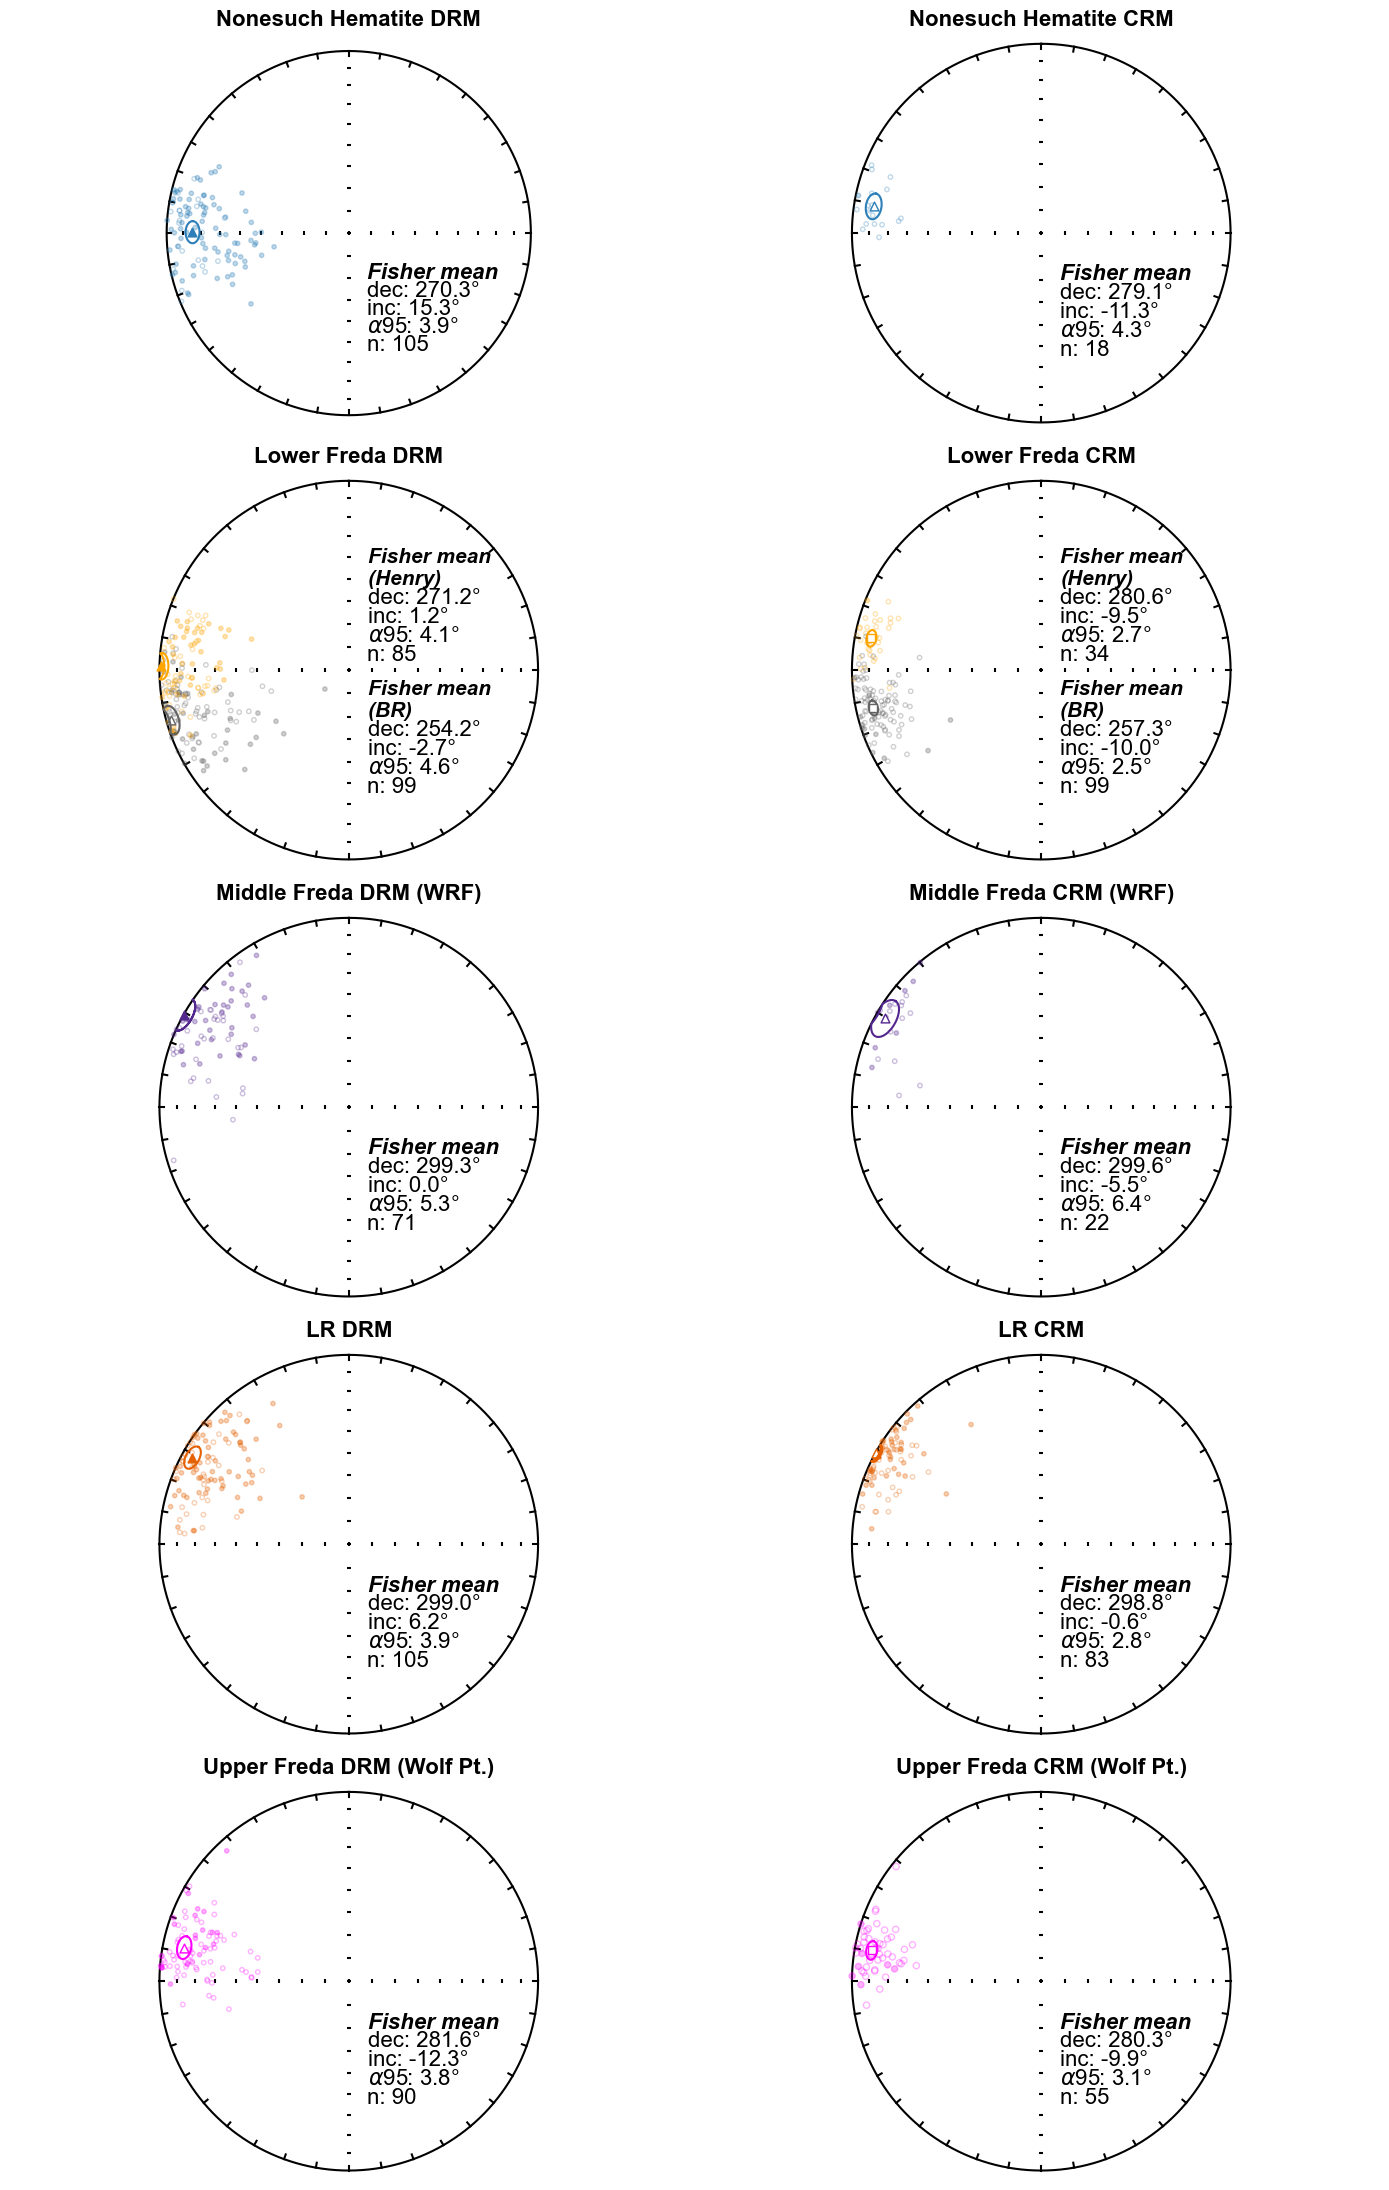

In [63]:
fig=plt.figure(figsize=(14,22))

plt.subplot(5,2,1)
ipmag.plot_net()
plt.title('Nonesuch Hematite DRM',fontsize=16,fontweight='semibold')
ipmag.plot_di(dec=nsch_hmt_drm['dir_dec'].tolist(), inc=nsch_unsquished_incs,color=nsch_color,markersize=10,alpha=0.3)
ipmag.plot_di_mean(dec=nsch_drm_mean['dec'],inc=nsch_drm_mean['inc'],a95=nsch_drm_mean['alpha95'],color=nsch_color, marker='^',markersize=40 )

plt.annotate('Fisher mean ',(0.1,-0.25),fontsize=16,style='italic',fontweight='semibold')
plt.annotate('dec: '+str(np.round(nsch_drm_mean['dec'],1))+'\u00b0',(0.1,-0.35),fontsize=16)
plt.annotate('inc: '+str(np.round(nsch_drm_mean['inc'],1))+'\u00b0',(0.1,-0.45),fontsize=16)
plt.annotate(r'$\alpha$95: '+str(np.round(nsch_drm_mean['alpha95'],1))+'\u00b0',(0.1,-0.55),fontsize=16)
plt.annotate('n: '+str(len(nsch_hmt_drm)),(0.099,-0.65),fontsize=16)




plt.subplot(5,2,9)
ipmag.plot_net()
plt.title('Upper Freda DRM (Wolf Pt.)',fontsize=16,fontweight='semibold')
ipmag.plot_di(dec=wp_HT['dir_dec'].tolist(), inc=wp_ht_unsquished_inc,color=WP_color,markersize=10,alpha=0.3)
ipmag.plot_di_mean(dec=wp_ht_unsquished_mean['dec'],inc=wp_ht_unsquished_mean['inc'],a95=wp_ht_unsquished_mean['alpha95'],color=WP_color, marker='^',markersize=40 )

plt.annotate('Fisher mean ',(0.1,-0.25),fontsize=16,style='italic',fontweight='semibold')
plt.annotate('dec: '+str(np.round(wp_ht_unsquished_mean['dec'],1))+'\u00b0',(0.1,-0.35),fontsize=16)
plt.annotate('inc: '+str(np.round(wp_ht_unsquished_mean['inc'],1))+'\u00b0',(0.1,-0.45),fontsize=16)
plt.annotate(r'$\alpha$95: '+str(np.round(wp_ht_unsquished_mean['alpha95'],1))+'\u00b0',(0.1,-0.55),fontsize=16)
plt.annotate('n: '+str(len(wp_HT)),(0.099,-0.65),fontsize=16)




plt.subplot(5,2,3)
ipmag.plot_net()
plt.title('Lower Freda DRM',fontsize=16,fontweight='semibold')
ipmag.plot_di(dec=BR_HT['dir_dec'].tolist(), inc=BR_HT_unsquished_inc,color=low_freda_color,markersize=10,alpha=0.3, label='This Study')
ipmag.plot_di(dec=Henry_HT['dir_dec'].tolist(), inc=Henry_HT_unsquished_inc,color='orange',markersize=10,alpha=0.3,label='Henry et al., 1977')
ipmag.plot_di_mean(dec=BR_HT_unsquished_mean['dec'],inc=BR_HT_unsquished_mean['inc'],a95=BR_HT_unsquished_mean['alpha95'],color=low_freda_color, marker='^',markersize=40 )
ipmag.plot_di_mean(dec=Henry_HT_unsquished_mean['dec'],inc=Henry_HT_unsquished_mean['inc'],a95=Henry_HT_unsquished_mean['alpha95'],color='orange', marker='^',markersize=40 )


plt.annotate('Fisher mean \n(BR) ',(0.1,-0.25),fontsize=15,style='italic',fontweight='semibold')
plt.annotate('dec: '+str(np.round(BR_HT_unsquished_mean['dec'],1))+'\u00b0',(0.1,-0.35),fontsize=16)
plt.annotate('inc: '+str(np.round(BR_HT_unsquished_mean['inc'],1))+'\u00b0',(0.1,-0.45),fontsize=16)
plt.annotate(r'$\alpha$95: '+str(np.round(BR_HT_unsquished_mean['alpha95'],1))+'\u00b0',(0.1,-0.55),fontsize=16)
plt.annotate('n: '+str(len(BR_HT)),(0.099,-0.65),fontsize=16)
#plt.legend(loc=(0.6,0.6))

plt.annotate('Fisher mean \n(Henry) ',(0.1,0.45),fontsize=15,style='italic',fontweight='semibold')
plt.annotate('dec: '+str(np.round(Henry_HT_unsquished_mean['dec'],1))+'\u00b0',(0.1,0.35),fontsize=16)
plt.annotate('inc: '+str(np.round(Henry_HT_unsquished_mean['inc'],1))+'\u00b0',(0.1,0.25),fontsize=16)
plt.annotate(r'$\alpha$95: '+str(np.round(Henry_HT_unsquished_mean['alpha95'],1))+'\u00b0',(0.1,0.15),fontsize=16)
plt.annotate('n: '+str(len(Henry_HT)),(0.099,0.05),fontsize=16)




plt.subplot(5,2,2)
ipmag.plot_net()
plt.title('Nonesuch Hematite CRM',fontsize=16,fontweight='semibold')
ipmag.plot_di(dec=nsch_hmt_crm['dir_dec'].tolist(), inc=nsch_hmt_crm['dir_inc'].tolist(),color=nsch_color,markersize=10,alpha=0.3)
ipmag.plot_di_mean(dec=nsch_crm_mean['dec'],inc=nsch_crm_mean['inc'],a95=nsch_crm_mean['alpha95'],color=nsch_color, marker='^',markersize=40 )

plt.annotate('Fisher mean ',(0.1,-0.25),fontsize=16,style='italic',fontweight='semibold')
plt.annotate('dec: '+str(np.round(nsch_crm_mean['dec'],1))+'\u00b0',(0.1,-0.35),fontsize=16)
plt.annotate('inc: '+str(np.round(nsch_crm_mean['inc'],1))+'\u00b0',(0.1,-0.45),fontsize=16)
plt.annotate(r'$\alpha$95: '+str(np.round(nsch_crm_mean['alpha95'],1))+'\u00b0',(0.1,-0.55),fontsize=16)
plt.annotate('n: '+str(len(nsch_hmt_crm)),(0.099,-0.65),fontsize=16)




plt.subplot(5,2,10)
ipmag.plot_net()
plt.title('Upper Freda CRM (Wolf Pt.)',fontsize=16,fontweight='semibold')
ipmag.plot_di(dec=wp_MT['dir_dec'].tolist(), inc=wp_MT['dir_inc'].tolist(),color=WP_color,alpha=0.3)
ipmag.plot_di_mean(dec=wp_MT_mean['dec'],inc=wp_MT_mean['inc'],a95=wp_MT_mean['alpha95'],color=WP_color, marker='s',markersize=40 )

plt.annotate('Fisher mean ',(0.1,-0.25),fontsize=16,style='italic',fontweight='semibold')
plt.annotate('dec: '+str(np.round(wp_MT_mean['dec'],1))+'\u00b0',(0.1,-0.35),fontsize=16)
plt.annotate('inc: '+str(np.round(wp_MT_mean['inc'],1))+'\u00b0',(0.1,-0.45),fontsize=16)
plt.annotate(r'$\alpha$95: '+str(np.round(wp_MT_mean['alpha95'],1))+'\u00b0',(0.1,-0.55),fontsize=16)
plt.annotate('n: '+str(len(wp_MT)),(0.099,-0.65),fontsize=16)


plt.subplot(5,2,4)
ipmag.plot_net()
plt.title('Lower Freda CRM',fontsize=16,fontweight='semibold')
ipmag.plot_di(dec=Henry_MT['dir_dec'].tolist(),inc=Henry_MT['dir_inc'].tolist(),color='orange',markersize=10,alpha=0.3,label='Henry et al., 1977')
ipmag.plot_di_mean(dec=Henry_MT_mean['dec'],inc=Henry_MT_mean['inc'],a95=Henry_MT_mean['alpha95'],color='orange', marker='s',markersize=40, zorder=3 )

ipmag.plot_di(dec=BR_MT['dir_dec'].tolist(), inc=BR_MT['dir_inc'].tolist(),color=low_freda_color,markersize=10, alpha=0.3)
ipmag.plot_di_mean(dec=BR_MT_mean['dec'],inc=BR_MT_mean['inc'],a95=BR_MT_mean['alpha95'],color=low_freda_color, marker='s',markersize=40, zorder=3 )


plt.annotate('Fisher mean \n(BR) ',(0.1,-0.25),fontsize=15,style='italic',fontweight='semibold')
plt.annotate('dec: '+str(np.round(BR_MT_mean['dec'],1))+'\u00b0',(0.1,-0.35),fontsize=16)
plt.annotate('inc: '+str(np.round(BR_MT_mean['inc'],1))+'\u00b0',(0.1,-0.45),fontsize=16)
plt.annotate(r'$\alpha$95: '+str(np.round(BR_MT_mean['alpha95'],1))+'\u00b0',(0.1,-0.55),fontsize=16)
plt.annotate('n: '+str(len(BR_HT)),(0.099,-0.65),fontsize=16)
#plt.legend(loc=(0.6,0.6))

plt.annotate('Fisher mean \n(Henry)',(0.1,0.45),fontsize=15,style='italic',fontweight='semibold')
plt.annotate('dec: '+str(np.round(Henry_MT_mean['dec'],1))+'\u00b0',(0.1,0.35),fontsize=16)
plt.annotate('inc: '+str(np.round(Henry_MT_mean['inc'],1))+'\u00b0',(0.1,0.25),fontsize=16)
plt.annotate(r'$\alpha$95: '+str(np.round(Henry_MT_mean['alpha95'],1))+'\u00b0',(0.1,0.15),fontsize=16)
plt.annotate('n: '+str(len(Henry_MT)),(0.099,0.05),fontsize=16)







plt.subplot(5,2,5)
ipmag.plot_net()
plt.title('Middle Freda DRM (WRF)',fontsize=16,fontweight='semibold')
ipmag.plot_di(dec=WRF_unflat_HT['dir_dec'].tolist(), inc=WRF_unflat_HT['dir_inc'].tolist(),color=WRF_color,markersize=10,alpha=0.3)
ipmag.plot_di_mean(dec=WRF_ht_unsquished_mean['dec'],inc=WRF_ht_unsquished_mean['inc'],a95=WRF_ht_unsquished_mean['alpha95'],color=WRF_color, marker='^',markersize=40 )
plt.annotate('Fisher mean ',(0.1,-0.25),fontsize=16,style='italic',fontweight='semibold')
plt.annotate('dec: '+str(np.round(WRF_ht_unsquished_mean['dec'],1))+'\u00b0',(0.1,-0.35),fontsize=16)
plt.annotate('inc: '+str(np.round(WRF_ht_unsquished_mean['inc'],1))+'\u00b0',(0.1,-0.45),fontsize=16)
plt.annotate(r'$\alpha$95: '+str(np.round(WRF_ht_unsquished_mean['alpha95'],1))+'\u00b0',(0.1,-0.55),fontsize=16)
plt.annotate('n: '+str(len(WRF_HT)),(0.099,-0.65),fontsize=16)



plt.subplot(5,2,6)
ipmag.plot_net()
plt.title('Middle Freda CRM (WRF)',fontsize=16,fontweight='semibold')
ipmag.plot_di(dec=WRF_MT['dir_dec'].tolist(), inc=WRF_MT['dir_inc'].tolist(),color=WRF_color,markersize=10,alpha=0.3)
ipmag.plot_di_mean(dec=WRF_MT_mean['dec'],inc=WRF_MT_mean['inc'],a95=WRF_MT_mean['alpha95'],color=WRF_color, marker='^',markersize=40 )

plt.annotate('Fisher mean ',(0.1,-0.25),fontsize=16,style='italic',fontweight='semibold')
plt.annotate('dec: '+str(np.round(WRF_MT_mean['dec'],1))+'\u00b0',(0.1,-0.35),fontsize=16)
plt.annotate('inc: '+str(np.round(WRF_MT_mean['inc'],1))+'\u00b0',(0.1,-0.45),fontsize=16)
plt.annotate(r'$\alpha$95: '+str(np.round(WRF_MT_mean['alpha95'],1))+'\u00b0',(0.1,-0.55),fontsize=16)
plt.annotate('n: '+str(len(WRF_MT)),(0.099,-0.65),fontsize=16)




plt.subplot(5,2,7)
ipmag.plot_net()
plt.title('LR DRM',fontsize=16,fontweight='semibold')
ipmag.plot_di(dec=LR_unflat_HT['dir_dec'].tolist(), inc=LR_unflat_HT['dir_inc'].tolist(),color=LR_color,markersize=10,alpha=0.3)
ipmag.plot_di_mean(dec=LR_ht_unsquished_mean['dec'],inc=LR_ht_unsquished_mean['inc'],a95=LR_ht_unsquished_mean['alpha95'],color=LR_color, marker='^',markersize=40 )
plt.annotate('Fisher mean ',(0.1,-0.25),fontsize=16,style='italic',fontweight='semibold')
plt.annotate('dec: '+str(np.round(LR_ht_unsquished_mean['dec'],1))+'\u00b0',(0.1,-0.35),fontsize=16)
plt.annotate('inc: '+str(np.round(LR_ht_unsquished_mean['inc'],1))+'\u00b0',(0.1,-0.45),fontsize=16)
plt.annotate(r'$\alpha$95: '+str(np.round(LR_ht_unsquished_mean['alpha95'],1))+'\u00b0',(0.1,-0.55),fontsize=16)
plt.annotate('n: '+str(len(LR_HT)),(0.099,-0.65),fontsize=16)



plt.subplot(5,2,8)
ipmag.plot_net()
plt.title('LR CRM',fontsize=16,fontweight='semibold')
ipmag.plot_di(dec=LR_MT['dir_dec'].tolist(), inc=LR_MT['dir_inc'].tolist(),color=LR_color,markersize=10,alpha=0.3)
ipmag.plot_di_mean(dec=LR_MT_mean['dec'],inc=LR_MT_mean['inc'],a95=LR_MT_mean['alpha95'],color=LR_color, marker='^',markersize=40 )

plt.annotate('Fisher mean ',(0.1,-0.25),fontsize=16,style='italic',fontweight='semibold')
plt.annotate('dec: '+str(np.round(LR_MT_mean['dec'],1))+'\u00b0',(0.1,-0.35),fontsize=16)
plt.annotate('inc: '+str(np.round(LR_MT_mean['inc'],1))+'\u00b0',(0.1,-0.45),fontsize=16)
plt.annotate(r'$\alpha$95: '+str(np.round(LR_MT_mean['alpha95'],1))+'\u00b0',(0.1,-0.55),fontsize=16)
plt.annotate('n: '+str(len(LR_MT)),(0.099,-0.65),fontsize=16)




fig.tight_layout()



# Paleogeography Plots 

This section plots figures for the main text and supplement 

1. The APWP for the Meso and Neoproterozoic poles from Laurentia
2. The progression of Paleolatitudes vs age 
3. The plate motion rates between Nonesuch and Jacobsville 

## APWP First

In [269]:
k_track=pd.read_csv('/Users/anthonyfuentes/GitHub/Freda_Pmag/data/Keweenaw_poles/k_track_poles.csv')
k_track.drop(k_track[(k_track['nominal_age']>=1141)].index,axis=0,inplace=True)

k_track.drop(k_track[k_track['unit']=='Haliburton'].index,axis=0,inplace=True)

In [271]:
BR_lat=46.4
BR_lon=-90

k_track.loc[len(k_track.index)]=['Cardenas Basalt',36.11,(-111.85+360), 15.9, 183.9, 7.4, 1081,1083,1084, 'Zhang et al.',2023]



cardenas_pole={'dec':183.9,'inc':15.9,'a95':7.4}
nsch_pole={'dec':182.9,'inc':6.6,'a95':2.8}
jcsb_pole={'dec':183.4,'inc':-16.9,'a95':3.1}

In [272]:
nsch_age=1079.8
freda_age=1046.7
lfreda_age=1075
cardenas_age=1082

Kent distribution pole for this study

In [282]:
kent_distribution_95={'dec': 168.32834068708033,
 'inc': 3.1580165406516056,
 'n': 99900,
 'Zdec': 261.7877674571156,
 'Zinc': 47.561645876607614,
 'Edec': 75.4543049750855,
 'Einc': 42.26372114284668,
 'Zeta': 3.0877552196822844,
 'Eta': 2.5111158213993865,
 'R1': 0.9995978257288075,
 'R2': 0.00016374890155666788}

In [283]:
jcb_kent = {'dec': 183.36786804377562,
                                'inc': -16.93317824752655,
                                'n': 100000,
                                'Zdec': 255.5312955073772,
                                'Zinc': 45.17328053818975,
                                'Edec': 108.13708896803058,
                                'Einc': 39.940041357248056,
                                'Zeta': 4.140010813466026,
                                'Eta': 3.0753784698415476,
                                'R1': 0.9993252817985119,
                                'R2': 0.00038897474625334844}

In [284]:
Nonesuch_Kent_pole = {'dec': 182.91788096243135,
                        'inc': 6.613852473782791,
                        'n': 100000,
                        'Zdec': 280.1822018286548,
                        'Zinc': 47.479879738402786,
                        'Edec': 86.97649522123652,
                        'Einc': 41.7562140964714,
                        'Zeta': 2.7717009260772785,
                        'Eta': 2.0259662318845577,
                        'R1': 0.9997006454105211,
                        'R2': 0.00018157508466288416}

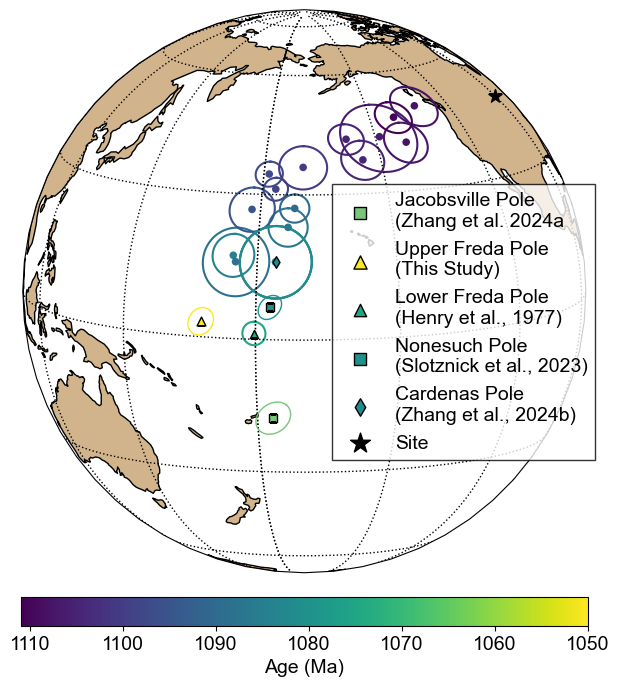

In [285]:
pole_axis = ipmag.make_orthographic_map(central_latitude=10, central_longitude=190)
plt.figure(num=1,figsize=(12, 12))

cmin=1050
cmax=1111
cnorm=colors.Normalize(cmin,cmax)
k_scalar=plt.cm.ScalarMappable(norm=cnorm,cmap='viridis_r')


for n in range(k_track.shape[0]):
    rgba =k_scalar.to_rgba(k_track['nominal_age'][n])
    hex_color = colors.rgb2hex(rgba)
    # print(hex_color)
    ipmag.plot_pole(pole_axis,k_track['plon'][n],k_track['plat'][n],k_track['a95'][n],
                    color=hex_color, markersize=30, edgecolor='none')
n_color=colors.rgb2hex(k_scalar.to_rgba(nsch_age))
f_color=colors.rgb2hex(k_scalar.to_rgba(freda_age))
c_color=colors.rgb2hex(k_scalar.to_rgba(cardenas_age))
l_color=colors.rgb2hex(k_scalar.to_rgba(lfreda_age))


#ipmag.plot_pole(pole_axis,jcsb_pole['dec'],jcsb_pole['inc'],jcsb_pole['a95'],marker='s',markersize=35,color=jcbs_color,label='Jacobsville Pole \n(Zhang et al. 2024a)')
ipmag.plot_pole_ellipse(pole_axis,jcb_kent,lower=0,color=jcbs_color,marker='s',markersize=35,label='Jacobsville Pole \n(Zhang et al. 2024a')


#ipmag.plot_pole(pole_axis,wp_unflat_HT_pole['dec'],wp_unflat_HT_pole['inc'],
 #wp_unflat_HT_pole['alpha95'],marker='^',markersize=40,color=f_color,edgecolor='black',label='Upper Freda Pole \n(This Study)')
ipmag.plot_pole_ellipse(pole_axis,kent_distribution_95,lower=0,color=f_color,marker='^',markersize=40,label='Upper Freda Pole \n(This Study)')


ipmag.plot_pole(pole_axis,Henry_ht_pole['dec'],Henry_ht_pole['inc'], 
                Henry_ht_pole['alpha95'],marker='^',markersize= 35,color=l_color,label='Lower Freda Pole \n(Henry et al., 1977)')
#ipmag.plot_pole(pole_axis,Henry_mt_pole['dec'],Henry_mt_pole['inc'], 
               # Henry_mt_pole['alpha95'],marker='^',markersize= 30,color=low_freda_color,label='Lower Freda \nPigmentary Pole')



#ipmag.plot_pole(pole_axis,nsch_pole['dec'],nsch_pole['inc'], nsch_pole['a95'],marker='s',markersize=35,color=n_color,label='Nonesuch Pole \n(Slotznick et al., 2023)')
ipmag.plot_pole_ellipse(pole_axis,Nonesuch_Kent_pole,lower=0,color=n_color,marker='s',markersize=35,label='Nonesuch Pole \n(Slotznick et al., 2023)')


ipmag.plot_pole(pole_axis,cardenas_pole['dec'],cardenas_pole['inc'],cardenas_pole['a95'],marker='d',markersize=35,color=c_color,label='Cardenas Pole \n(Zhang et al., 2024b)')



#ipmag.plot_pole(pole_axis,LR_unflat_HT_pole['dec'],LR_unflat_HT_pole['inc'],
#LR_unflat_HT_pole['alpha95'],marker='o',color='#d7191c',label='LR pole')


#ipmag.plot_pole(pole_axis,BRd_unflat_HT_pole['dec'],BRd_unflat_HT_pole['inc'],BRd_HT_pole['alpha95'],marker='s',markersize=50,color='orange',label='BRd pole')
ipmag.plot_pole(pole_axis,lr_lon,lr_lat,0,marker='*',markersize=100,label='Site')




cbar=plt.colorbar(k_scalar,ax=pole_axis,orientation='horizontal', fraction=0.046, pad=0.04,label='Age (Ma)')
cbar.set_label(label='Age (Ma)',size=14)
cbar.ax.tick_params(labelsize=14)
cbar.ax.invert_xaxis()

plt.legend(fontsize=14,markerscale=1.5,fancybox=False,edgecolor='black',loc=(0.55,0.2))



## Rotated Poles vs unrotated 

Here we can see that the DRM for Wolfpoint completely agrees with CRM from the lower units. The WRF, BR , and LR sections have clearly experienced vertical axis rotations

In [301]:
nsch_hmt_crm['lat']=BR_lat
nsch_hmt_crm['lon']=BR_lon

nsch_hmt_crm=ipmag.vgp_calc(nsch_hmt_crm,tilt_correction='no',
                           site_lon='lon',
                           site_lat='lat',
                           dec_is='dir_dec',
                           inc_is='dir_inc')



nsch_crm_pole=ipmag.fisher_mean(nsch_hmt_crm['vgp_lon'].tolist(),nsch_hmt_crm['vgp_lat'].tolist())
nsch_crm_pole

{'dec': 169.48227657132404,
 'inc': 1.9933212128683908,
 'n': 18,
 'r': 17.838094326752078,
 'k': 104.99940897048313,
 'alpha95': 3.3892100009325397,
 'csd': 7.904812838427344}

In [303]:
LR_MT=ipmag.vgp_calc(LR_MT,tilt_correction='no',
                           site_lon='lon',
                           site_lat='lat',
                           dec_is='dir_dec',
                           inc_is='dir_inc')

LR_crm_pole=ipmag.fisher_mean(LR_MT['vgp_lon'].tolist(),LR_MT['vgp_lat'].tolist())


WRF_MT=ipmag.vgp_calc(WRF_MT,tilt_correction='no',
                           site_lon='lon',
                           site_lat='lat',
                           dec_is='dir_dec',
                           inc_is='dir_inc')
WRF_crm_pole=ipmag.fisher_mean(WRF_MT['vgp_lon'].tolist(),WRF_MT['vgp_lat'].tolist())


br_mt=ipmag.vgp_calc(BR_MT,tilt_correction='no',
                           site_lon='lon',
                           site_lat='lat',
                           dec_is='dir_dec',
                           inc_is='dir_inc')

BR_crm_pole=ipmag.fisher_mean(br_mt['vgp_lon'].tolist(),br_mt['vgp_lat'].tolist())

wp_MT=ipmag.vgp_calc(wp_MT,tilt_correction='no',
                           site_lon='lon',
                           site_lat='lat',
                           dec_is='dir_dec',
                           inc_is='dir_inc')

WP_crm_pole=ipmag.fisher_mean(wp_MT['vgp_lon'].tolist(),wp_MT['vgp_lat'].tolist())


In [325]:
ipmag.print_pole_mean(WP_crm_pole)

Plon: 170.0  Plat: 3.3
Number of directions in mean (n): 55
Angular radius of 95% confidence (A_95): 2.2
Precision parameter (k) estimate: 77.8


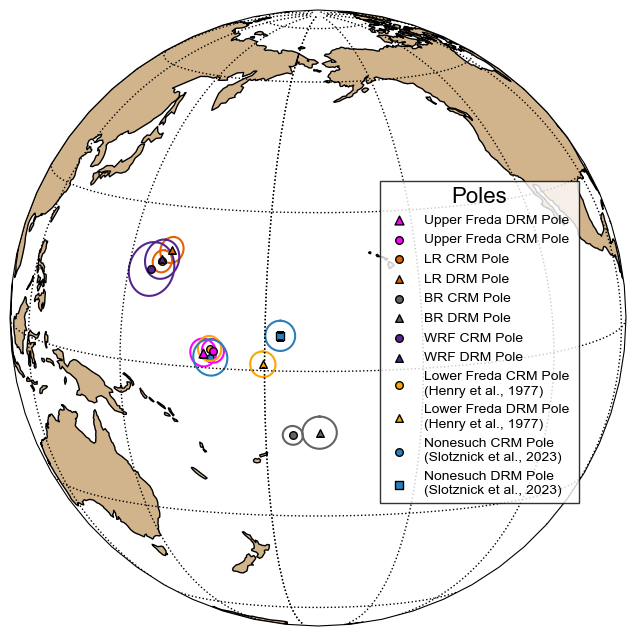

In [304]:
pole_axis = ipmag.make_orthographic_map(central_latitude=10, central_longitude=190)
plt.figure(num=1,figsize=(12, 12))

ipmag.plot_pole(pole_axis,wp_unflat_HT_pole['dec'],wp_unflat_HT_pole['inc'],wp_unflat_HT_pole['alpha95'],marker='^',markersize=40,
                color=WP_color,label='Upper Freda DRM Pole')
ipmag.plot_pole(pole_axis,WP_crm_pole['dec'],WP_crm_pole['inc'],WP_crm_pole['alpha95'],marker='o',markersize=30,
                color=WP_color,label='Upper Freda CRM Pole')

ipmag.plot_pole(pole_axis,LR_crm_pole['dec'],LR_crm_pole['inc'], LR_crm_pole['alpha95'],marker='o',markersize=30,color=LR_color,label='LR CRM Pole')
ipmag.plot_pole(pole_axis,LR_HT_pole['dec'],LR_HT_pole['inc'], LR_HT_pole['alpha95'],marker='^',markersize=30,color=LR_color,label='LR DRM Pole')

ipmag.plot_pole(pole_axis,BR_crm_pole['dec'],BR_crm_pole['inc'], BR_crm_pole['alpha95'],marker='o',markersize=30,color=low_freda_color,label='BR CRM Pole')
ipmag.plot_pole(pole_axis,BR_HT_pole['dec'],BR_HT_pole['inc'], BR_HT_pole['alpha95'],marker='^',markersize=30,color=low_freda_color,label='BR DRM Pole')

ipmag.plot_pole(pole_axis,WRF_crm_pole['dec'],WRF_crm_pole['inc'], WRF_crm_pole['alpha95'],marker='o',markersize=30,color=WRF_color,label='WRF CRM Pole')
ipmag.plot_pole(pole_axis,WRF_unflat_HT_pole['dec'],WRF_unflat_HT_pole['inc'], WRF_unflat_HT_pole['alpha95'],marker='^',markersize=30,color=WRF_color,label='WRF DRM Pole')


ipmag.plot_pole(pole_axis,Henry_mt_pole['dec'],Henry_mt_pole['inc'],Henry_mt_pole['alpha95'],marker='o',markersize=30,
                color='orange',label='Lower Freda CRM Pole \n(Henry et al., 1977)',zorder=-1)
ipmag.plot_pole(pole_axis,Henry_ht_pole['dec'],Henry_ht_pole['inc'],Henry_ht_pole['alpha95'],marker='^',markersize=30,
                color='orange',label='Lower Freda DRM Pole \n(Henry et al., 1977)')

ipmag.plot_pole(pole_axis,nsch_crm_pole['dec'],nsch_crm_pole['inc'],nsch_crm_pole['alpha95'],marker='o',markersize=30,
                color=nsch_color,label='Nonesuch CRM Pole \n(Slotznick et al., 2023)',zorder=-10)
ipmag.plot_pole(pole_axis,nsch_pole['dec'],nsch_pole['inc'], nsch_pole['a95'],marker='s',markersize=30,color=nsch_color,label='Nonesuch DRM Pole \n(Slotznick et al., 2023)')



plt.legend(loc=(0.6,0.2),fancybox=False,edgecolor='black',title='Poles',title_fontsize=16)

## Palelat vs Age

In [291]:

plats=[]

for n in k_track.index:
    plats.append(ipmag.lat_from_pole(BR_lon,BR_lat,k_track['plon'][n], k_track['plat'][n]))


wp_lats=ipmag.lat_from_pole(BR_lon,BR_lat,wp_unflat_HT_pole['dec'],wp_unflat_HT_pole['inc'])

lr_lats=ipmag.lat_from_pole(BR_lon,BR_lat,LR_unflat_HT_pole['dec'],LR_unflat_HT_pole['inc'])
wrf_lats=ipmag.lat_from_pole(BR_lon,BR_lat,WRF_unflat_HT_pole['dec'],WRF_unflat_HT_pole['inc'])

low_freda_lat=ipmag.lat_from_pole(BR_lon, BR_lat, Henry_ht_pole['dec'],Henry_ht_pole['inc'])

nsch_lat=ipmag.lat_from_pole(BR_lon, BR_lat, 182.9,6.6)
jcb_lat=ipmag.lat_from_pole(BR_lon,BR_lat,183.4,-16.9)
cardenas_lats=ipmag.lat_from_pole(BR_lon,BR_lat,cardenas_pole['dec'],cardenas_pole['inc'])



Text(0.5, 1.0, 'Paleolatitude of Study Location (lat= 46.4°N, lon= 90.2°W) Implied by Poles')

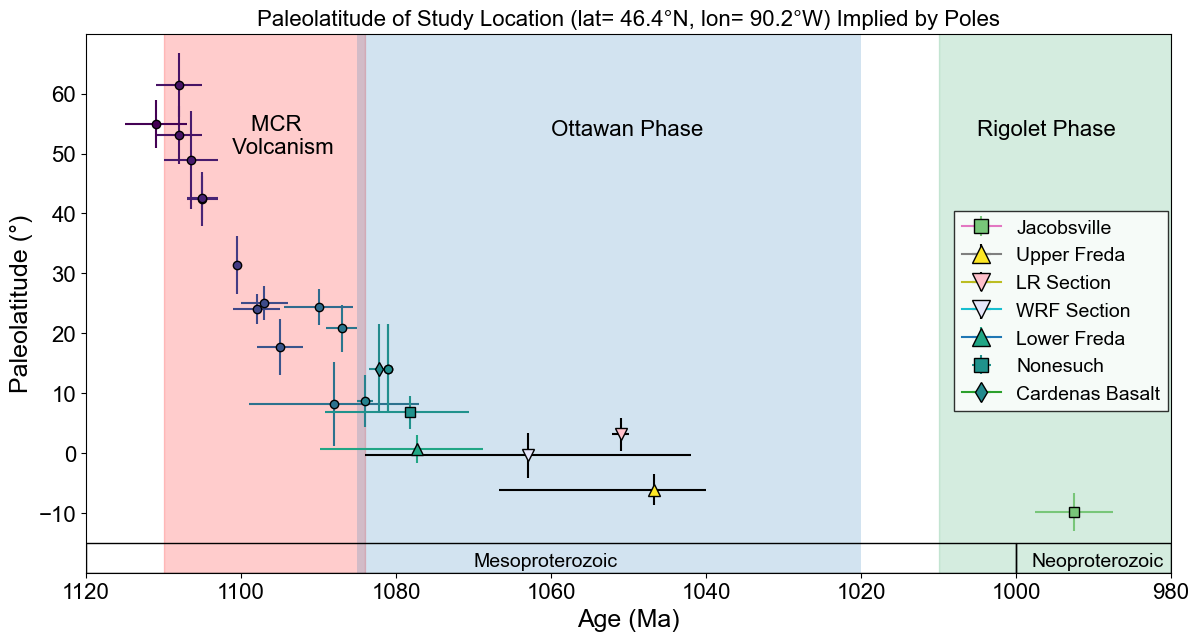

In [293]:
plt.figure(figsize=(14,7))

for n in range(k_track.shape[0]):
    rgba =k_scalar.to_rgba(k_track['nominal_age'][n])
    hex_color = colors.rgb2hex(rgba)
    # print(hex_color)
    plt.errorbar(x=k_track['nominal_age'][n],y=plats[n],yerr=k_track['a95'][n],xerr=[(k_track['max'][n]-k_track['min'][n])/2],
                 marker='o',mfc=hex_color,ecolor=hex_color,markeredgecolor='black',ls='')

#plt.errorbar(x=k_track['nominal_age'],y=plats,yerr=k_track['a95'],xerr=[(k_track['max']-k_track['min'])/2], fmt='.k')

plt.errorbar(x=992.51,y=jcb_lat,xerr=5,yerr=jcsb_pole['a95'],marker='s',markersize=7,
             mfc=jcbs_color,ecolor=jcbs_color,markeredgecolor='black',label='Jacobsville')

plt.errorbar(x=1046.7,y=wp_lats,xerr=np.array([[6.7,20]]).T,yerr=wp_unflat_HT_pole['alpha95'],marker='^',markersize=9,
             mfc=f_color,ecolor='black',markeredgecolor='black',label='Upper Freda')

plt.errorbar(x=1051,y=lr_lats,xerr=1.1,yerr=LR_unflat_HT_pole['alpha95'],marker='v',markersize=9,
             mfc='pink',ecolor='black',markeredgecolor='black',label='LR Section')

plt.errorbar(x=1063,y=wrf_lats,xerr=21,yerr=WRF_unflat_HT_pole['alpha95'],marker='v',markersize=9,
             mfc='lavender',ecolor='black',markeredgecolor='black',label='WRF Section')


plt.errorbar(x=1077.3,y=low_freda_lat,xerr=np.array([[8.5,12.48]]).T,yerr=Henry_ht_pole['alpha95'],marker='^',markersize=9,
             mfc=l_color,ecolor=l_color,markeredgecolor='black',label='Lower Freda')



plt.errorbar(x=1078.2,y=nsch_lat,xerr=np.array([[7.62,10.92]]).T,yerr=nsch_pole['a95'],
             marker='s',markersize=7 ,mfc=n_color,ecolor=n_color,markeredgecolor='black',ls='',label='Nonesuch')

plt.errorbar(x=1082.18,y=cardenas_lats,xerr=1.25,yerr=cardenas_pole['a95'],marker='d',
             markersize=7,mfc=c_color,ecolor=c_color,markeredgecolor='black',label='Cardenas Basalt')




plt.axvspan(1085,1020, ymin=-10,ymax=70,alpha=0.2)

plt.axvspan(1110,1084, ymin=-10,ymax=70,alpha=0.2,color='red',edgecolor='black',zorder=0)
plt.axvspan(1010,980, ymin=-10,ymax=70,alpha=0.2,color='#2ca25f',edgecolor='black',zorder=0)

ax=plt.gca()


ax.annotate('MCR \n Volcanism',(1095,50),horizontalalignment='center',fontsize=16)
ax.annotate('Ottawan Phase',(1060,53),fontsize=16)
ax.annotate('Rigolet Phase',(1005,53),fontsize=16)



ax.add_patch(Rectangle((1000,-20), -20, 5, #Neoprot
             edgecolor='black',
             facecolor = 'none',
             fill=True,
             lw=1))
ax.add_patch(Rectangle((1000,-20),120, 5, #Meso
             edgecolor='black',
             facecolor = 'none',
             fill=True,
             lw=1))
ax.annotate('Mesoproterozoic',(1070,-19),fontsize=14)
ax.annotate('Neoproterozoic',(998,-19),fontsize=14)



ax.set_xlim(980,1120)
ax.set_ylim(-20,70)
ax.set_yticks(np.arange(-10,70,10))

plt.gca().invert_xaxis()
plt.xticks(font='arial', fontsize=16)
plt.yticks(font='arial', fontsize=16)
plt.xlabel('Age (Ma)',font='arial',fontsize=18)
plt.ylabel('Paleolatitude (°)', font='arial',fontsize=18)
plt.legend(fontsize=14,markerscale=1.5,fancybox=False,edgecolor='black',loc=(0.8,0.3))

plt.title('Paleolatitude of Study Location (lat= 46.4°N, lon= 90.2°W) Implied by Poles', font='arial',fontsize=16)



### Comparison to the Grenville Loop pole

In [294]:
brown_gneiss=ipmag.lat_from_pole(BR_lon,BR_lat,148.66,-18.98)
brown_anorth=ipmag.lat_from_pole(BR_lon,BR_lat,143.39,-25.185)
brown_granite=ipmag.lat_from_pole(BR_lon,BR_lat,131.73,-28.46)

hal_lat=ipmag.lat_from_pole(BR_lon,BR_lat,141.9,-32.69)




Text(0.5, 1.0, 'Paleolatitude of Study Location (lat= 46.4°N, lon= 90.2°W) Implied by Poles')

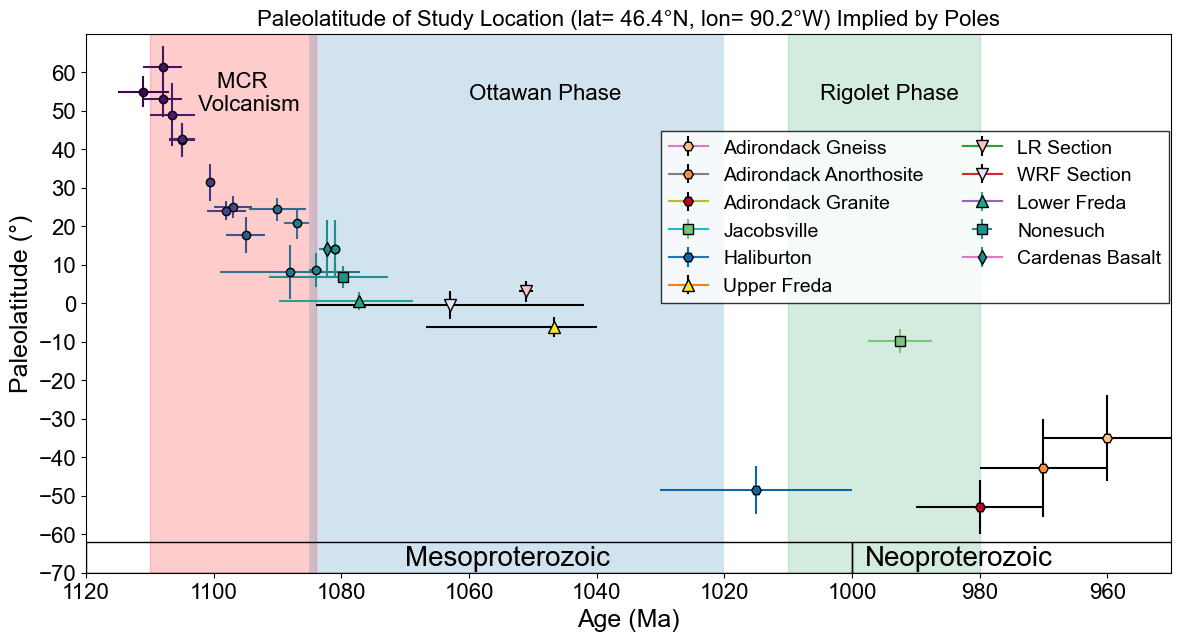

In [296]:
plt.figure(figsize=(14,7))

for n in range(k_track.shape[0]):
    rgba =k_scalar.to_rgba(k_track['nominal_age'][n])
    hex_color = colors.rgb2hex(rgba)
    # print(hex_color)
    plt.errorbar(x=k_track['nominal_age'][n],y=plats[n],yerr=k_track['a95'][n],xerr=[(k_track['max'][n]-k_track['min'][n])/2],
                 marker='o',mfc=hex_color,ecolor=hex_color,markeredgecolor='black',ls='')

#plt.errorbar(x=k_track['nominal_age'],y=plats,yerr=k_track['a95'],xerr=[(k_track['max']-k_track['min'])/2], fmt='.k')


plt.errorbar(x=960,y=brown_gneiss,xerr=10,yerr=11.2,marker='H',
             markersize=7,mfc='#fdbe85',ecolor='black',markeredgecolor='black',label='Adirondack Gneiss')
plt.errorbar(x=970,y=brown_anorth,xerr=10,yerr=12.76,marker='H',
             markersize=7,mfc='#fd8d3c',ecolor='black',markeredgecolor='black',label='Adirondack Anorthosite')
plt.errorbar(x=980,y=brown_granite,xerr=10,yerr=7.05,marker='H',
             markersize=7,mfc='#bd0026',ecolor='black',markeredgecolor='black',label='Adirondack Granite')

plt.errorbar(x=992.51,y=jcb_lat,xerr=5,yerr=jcsb_pole['a95'],marker='s',markersize=7,
             mfc=jcbs_color,ecolor=jcbs_color,markeredgecolor='black',label='Jacobsville')

plt.errorbar(x=1015,y=hal_lat,xerr=15,yerr=6.3,marker='H',markersize=7,
             mfc='#0868ac',ecolor='#0868ac',markeredgecolor='black',label='Haliburton')


plt.errorbar(x=1046.7,y=wp_lats,xerr=np.array([[6.7,20]]).T,yerr=wp_unflat_HT_pole['alpha95'],marker='^',markersize=9,
             mfc=f_color,ecolor='black',markeredgecolor='black',label='Upper Freda')
plt.errorbar(x=1051,y=lr_lats,xerr=1.1,yerr=LR_unflat_HT_pole['alpha95'],marker='v',markersize=9,
             mfc='pink',ecolor='black',markeredgecolor='black',label='LR Section')

plt.errorbar(x=1063,y=wrf_lats,xerr=21,yerr=WRF_unflat_HT_pole['alpha95'],marker='v',markersize=9,
             mfc='lavender',ecolor='black',markeredgecolor='black',label='WRF Section')


plt.errorbar(x=1077.3,y=low_freda_lat,xerr=np.array([[8.5,12.48]]).T,yerr=Henry_ht_pole['alpha95'],marker='^',markersize=9,
             mfc=l_color,ecolor=l_color,markeredgecolor='black',label='Lower Freda')



plt.errorbar(x=1079.8,y=nsch_lat,xerr=np.array([[7.07,11.48]]).T,yerr=nsch_pole['a95'],
             marker='s',markersize=7 ,mfc=n_color,ecolor=n_color,markeredgecolor='black',ls='',label='Nonesuch')

plt.errorbar(x=1082.18,y=cardenas_lats,xerr=1.25,yerr=cardenas_pole['a95'],marker='d',
             markersize=7,mfc=c_color,ecolor=c_color,markeredgecolor='black',label='Cardenas Basalt')




plt.axvspan(1085,1020, ymin=-10,ymax=70,alpha=0.2)

plt.axvspan(1110,1084, ymin=-10,ymax=70,alpha=0.2,color='red',edgecolor='black',zorder=0)
plt.axvspan(1010,980, ymin=-10,ymax=70,alpha=0.2,color='#2ca25f',edgecolor='black',zorder=0)

ax=plt.gca()


ax.annotate('MCR \n Volcanism',(1095,50),horizontalalignment='center',fontsize=16)
ax.annotate('Ottawan Phase',(1060,53),fontsize=16)
ax.annotate('Rigolet Phase',(1005,53),fontsize=16)



ax.add_patch(Rectangle((1000,-70), -70, 8, #Neoprot
             edgecolor='black',
             facecolor = 'none',
             fill=True,
             lw=1))
ax.add_patch(Rectangle((1000,-70),120, 8, #Meso
             edgecolor='black',
             facecolor = 'none',
             fill=True,
             lw=1))
ax.annotate('Mesoproterozoic',(1070,-68),fontsize=20)
ax.annotate('Neoproterozoic',(998,-68),fontsize=20)



ax.set_xlim(950,1120)
ax.set_ylim(-20,70)
ax.set_yticks(np.arange(-70,70,10))

plt.gca().invert_xaxis()
plt.xticks(font='arial', fontsize=16)
plt.yticks(font='arial', fontsize=16)
plt.xlabel('Age (Ma)',font='arial',fontsize=18)
plt.ylabel('Paleolatitude (°)', font='arial',fontsize=18)
plt.legend(fontsize=14,markerscale=1,ncols=2,fancybox=False,edgecolor='black',loc=(0.53,0.5))

plt.title('Paleolatitude of Study Location (lat= 46.4°N, lon= 90.2°W) Implied by Poles', font='arial',fontsize=16)



## Plate Rates 

- First for Upper Freda to Jacobsville
- Then  Nonesuch to Upper Freda

In [308]:
Jacobsville_upper_age = 992
Jacobsville_lower_age = 980
Freda_upper_age = 1067
Freda_lower_age = 1040

n = 10000

J_ages = np.random.uniform(low=Jacobsville_lower_age, high=Jacobsville_upper_age, size=n)
F_ages = np.random.uniform(low=Freda_lower_age, high=Freda_upper_age, size=n)

F_resample = ipmag.kentrot(kent_distribution_95, n=n)
J_resample = ipmag.kentrot(jcb_kent, n=n)

wp_lat, wp_lon = 47.0, -89.030556

J_plats = []
F_plats = []
J_F_distances = []
J_F_rates = []

for i in range(n):
    J_plats.append(90-pmag.angle(J_resample[i], [wp_lon, wp_lat])[0])
    F_plats.append(90-pmag.angle(F_resample[i], [wp_lon, wp_lat])[0])

    J_F_distances.append(pmag.angle(J_resample[i], F_resample[i])[0])
    J_F_rates.append(J_F_distances[i]/abs(J_ages[i]-F_ages[i])*110.567/10)

In [306]:
rate_lower = np.round(np.percentile(J_F_rates, 2.5),1)
rate_higher = np.round(np.percentile(J_F_rates, 97.5),1)
rate_median = np.round(np.median(J_F_rates),1)

Text(0, 0.5, 'Distribution')

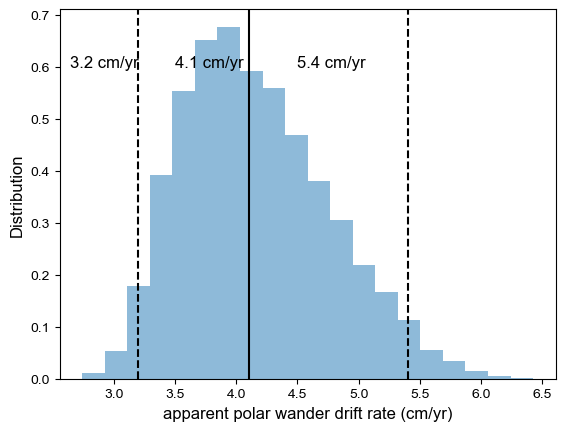

In [307]:
plt.hist(J_F_rates, bins=20, color='C0', edgecolor='none', alpha=0.5, density=1)
plt.axvline(rate_lower, color='k', linestyle='--')
plt.axvline(rate_higher, color='k', linestyle='--')
plt.axvline(rate_median, color='k', linestyle='-')
plt.text(2.64,0.6, str(rate_lower)+ ' cm/yr', color='k', fontsize=12)
plt.text(3.5,0.6, str(rate_median)+ ' cm/yr', color='k', fontsize=12)
plt.text(4.5,0.6, str(rate_higher)+ ' cm/yr', color='k', fontsize=12)

plt.xlabel('apparent polar wander drift rate (cm/yr)', fontsize=12)
plt.ylabel('Distribution', fontsize=12)

In [313]:
Nonesuch_upper_age = 1085
Nonesuch_lower_age = 1078
Freda_upper_age = 1067
Freda_lower_age = 1040

n = 10000

N_ages = np.random.uniform(low=Nonesuch_lower_age, high=Nonesuch_upper_age, size=n)
F_ages = np.random.uniform(low=Freda_lower_age, high=Freda_upper_age, size=n)

F_resample = ipmag.kentrot(kent_distribution_95, n=n)
N_resample = ipmag.kentrot(Nonesuch_Kent_pole, n=n)

wp_lat, wp_lon = 47.0, -89.030556

N_plats = []
F_plats = []
N_F_distances = []
N_F_rates = []

for i in range(n):
    N_plats.append(90-pmag.angle(N_resample[i], [wp_lon, wp_lat])[0])
    F_plats.append(90-pmag.angle(F_resample[i], [wp_lon, wp_lat])[0])

    N_F_distances.append(pmag.angle(N_resample[i], F_resample[i])[0])
    N_F_rates.append(N_F_distances[i]/abs(N_ages[i]-F_ages[i])*110.567/10)

In [314]:
n_rate_lower = np.round(np.percentile(N_F_rates, 2.5),1)
n_rate_higher = np.round(np.percentile(N_F_rates, 97.5),1)
n_rate_median = np.round(np.median(N_F_rates),1)

Text(0, 0.5, 'Distribution')

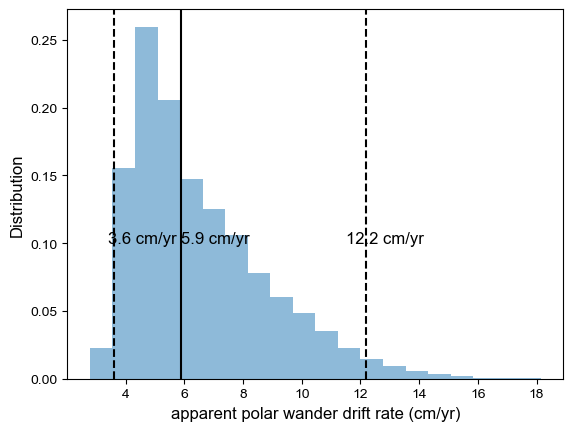

In [319]:
plt.hist(N_F_rates, bins=20, color='C0', edgecolor='none', alpha=0.5, density=1)
plt.axvline(n_rate_lower, color='k', linestyle='--')
plt.axvline(n_rate_higher, color='k', linestyle='--')
plt.axvline(n_rate_median, color='k', linestyle='-')
plt.text(3.4,0.1, str(n_rate_lower)+ ' cm/yr', color='k', fontsize=12)
plt.text(5.9,0.1, str(n_rate_median)+ ' cm/yr', color='k', fontsize=12)
plt.text(11.5,0.1, str(n_rate_higher)+ ' cm/yr', color='k', fontsize=12)

plt.xlabel('apparent polar wander drift rate (cm/yr)', fontsize=12)
plt.ylabel('Distribution', fontsize=12)

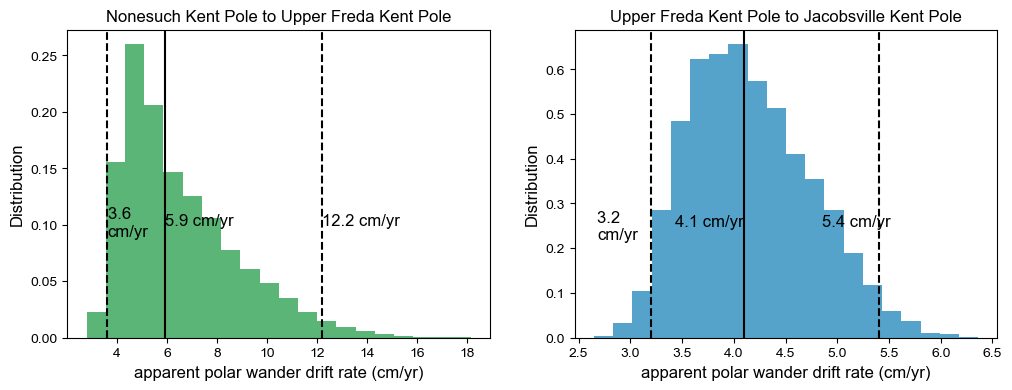

In [323]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,4))


ax[0].hist(N_F_rates, bins=20, color='#31a354', edgecolor='none', alpha=0.8, density=1)
ax[0].axvline(n_rate_lower, color='k', linestyle='--')
ax[0].axvline(n_rate_higher, color='k', linestyle='--')
ax[0].axvline(n_rate_median, color='k', linestyle='-')
ax[0].text(3.62,0.09, str(n_rate_lower)+ ' \ncm/yr', color='k', fontsize=12)
ax[0].text(5.9,0.1, str(n_rate_median)+ ' cm/yr', color='k', fontsize=12)
ax[0].text(12.2,0.1, str(n_rate_higher)+ ' cm/yr', color='k', fontsize=12)

ax[0].set_xlabel('apparent polar wander drift rate (cm/yr)', fontsize=12)
ax[0].set_ylabel('Distribution', fontsize=12)
ax[0].set_title('Nonesuch Kent Pole to Upper Freda Kent Pole')

ax[1].hist(J_F_rates, bins=20, color='#2b8cbe', edgecolor='none', alpha=0.8, density=1)
ax[1].axvline(rate_lower, color='k', linestyle='--')
ax[1].axvline(rate_higher, color='k', linestyle='--')

ax[1].axvline(rate_median, color='k', linestyle='-')
ax[1].text(2.68,0.22, str(rate_lower)+ ' \ncm/yr', color='k', fontsize=12)

ax[1].text(3.43,0.25, str(rate_median)+ ' cm/yr', color='k', fontsize=12)

ax[1].text(4.85,0.25, str(rate_higher)+ ' cm/yr', color='k', fontsize=12)
ax[1].set_xlabel('apparent polar wander drift rate (cm/yr)', fontsize=12)
ax[1].set_ylabel('Distribution', fontsize=12)
ax[1].set_title('Upper Freda Kent Pole to Jacobsville Kent Pole')

plt.savefig('plate_rates.pdf',dpi=300,bbox_inches='tight')
